<center><img src="https://static3.depositphotos.com/1006458/211/i/600/depositphotos_2111331-stock-photo-fast-taxi.jpg\" width="600" height="398"></center>

<font size="8"><b><h2><center>G2M Insight for Cab Investment Firm</center></h2></b>

# Problem Statement

## Context:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Objective:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Description:

Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

* Review the Source Documentation
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Create master data and explain the relationship
* Identify and remove duplicates
* Perform other analysis like NA value and outlier detection

# Importing necessary libraries

In [2]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

#To convert to datetime
from datetime import datetime, timedelta

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Loading the datasets

In [3]:
# loading the dataset from my local folder
cab_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\Cab_Data.csv")

In [4]:
# creating a copy of the dataset
df_cab = cab_data.copy()
df_cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63


In [5]:
# checking the shape of the dataset
df_cab.shape

(359392, 7)

In [6]:
# loading the dataset from my local folder
city_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\City.csv")

In [7]:
# creating a copy of the dataset
df_city = city_data.copy()
df_city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [8]:
# checking the shape of the dataset
df_city.shape

(20, 3)

In [9]:
# loading and creating a copy of the dataset
Cust_id_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\Customer_ID.csv")

df_cust = Cust_id_data.copy()
df_cust.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [10]:
# checking the shape of the dataset
df_cust.shape

(49171, 4)

In [11]:
# loading and creating a copy of the dataset
trans_id_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\Transaction_ID.csv")

df_trans = trans_id_data.copy()
df_trans.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [12]:
# checking the shape of the dataset
df_trans.shape

(440098, 3)

### Observations:
* Cab_Data (`df_cab`) dataset has 359,392 observations and 7 features
* City (`df_city`) dataset has 20 observations and 3 features
* Customer_ID (`df_cust`) dataset has 49,171 observations and 7 features
* Transaction_ID (`df_trans`) dataset has 440,098 observations and 3 features
* `df_city` and `df_trans` have a feature shared with `df_cab`
* `df_cust` has feature in common only with `df_trans`
* `df_trans` and `df_cab` have the most observations and have the Transaction_ID column in common. However, `df_trans`has more observations than `df_cab` suggesting there are transactions with no accompanying cab data. These will be dropped when merging the datasets

## Merging the datasets into one

In [13]:
# merging df_cab and df_city datasets
cabcity_data = pd.merge(left = df_cab, right = df_city, how = "inner")
cabcity_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,"814,885","24,701"


In [14]:
# Checking the number of Cities in df_City
df_city.City.value_counts()

NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: City, dtype: int64

In [15]:
df_cab.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [16]:
# Checking the number of Cities in merged dataframe
cabcity_data.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [17]:
# checking the shape of the dataset
cabcity_data.shape

(359392, 9)

#### Observation: 
* There appears to be no cab data for San Francisco otherwise the number of observations is maintained.

In [18]:
# merging df_trans and df_cust datasets
cust_trans_data = pd.merge(left = df_trans, right = df_cust, how = "inner")
cust_trans_data.head(3)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813


In [19]:
# checking the shape of the dataset
cust_trans_data.shape

(440098, 6)

#### Observation: 
* The number of observations is maintained 

In [20]:
# Joining of  cabcity_data with cust_trans_data dataset
full_cabdata = pd.merge(left = cabcity_data, right = cust_trans_data, how = "inner")
full_cabdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,"814,885","24,701",27182,Card,Male,33,8536


In [21]:
# checking the shape of the dataset
full_cabdata.shape

(359392, 14)

#### Observations: 
* The number of observations is consistent with the number of observations in the `df_cab`.
* Observations (80,706 of 440,098) in `df_trans` that do not have corresponding data with `df_cab` have been removed.

In [22]:
# creating a copy of the merged dataset
dff = full_cabdata.copy()
dff.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,"814,885","24,701",28712,Cash,Male,53,11242


In [23]:
dff.shape

(359392, 14)

#### Observations: 
* The dataset has 359,392 observations and 14 features

In [24]:
# Date Initialization to convert timedelta
start_date = datetime(1900, 1, 1) 

# Converting the 'Date of Travel' column from timedelta to conventional date format
index = range(dff['Date of Travel'].count())
for i in index:
    dff['Date of Travel'][i] = (start_date + timedelta(days=int(dff['Date of Travel'][i])-2)).strftime("%d/%m/%Y")
    
dff.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,"814,885","24,701",28712,Cash,Male,53,11242


In [25]:
# To change the data type of the'Date of Travel' column to datetime data type
dff['Date of Travel'] = pd.to_datetime(dff['Date of Travel'], format='%d/%m/%Y')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

## Additional data

### US Holiday Data 2016 - 2018

In [26]:
# loading and creating a copy of the holiday dataset
hol_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\us_states_hol_data.csv")

df_hol = hol_data.copy()
df_hol.head(3)

,City,Date,Holiday
0,NASHVILLE TN,42370,New Year's Day
1,NASHVILLE TN,42387,Martin Luther King Jr. Day
2,NASHVILLE TN,42415,President's Day


In [27]:
df_hol.shape

(817, 3)

In [28]:
# Converting the 'Date' column from timedelta to conventional date format
index = range(df_hol['Date'].count())
for i in index:
    df_hol['Date'][i] = (start_date + timedelta(days=int(df_hol['Date'][i])-2)).strftime("%d/%m/%Y")

df_hol.head()

,City,Date,Holiday
0,NASHVILLE TN,01/01/2016,New Year's Day
1,NASHVILLE TN,18/01/2016,Martin Luther King Jr. Day
2,NASHVILLE TN,15/02/2016,President's Day
3,NASHVILLE TN,25/03/2016,Good Friday
4,NASHVILLE TN,30/05/2016,Memorial Day


In [29]:
# To change the data type of the'Date' column to datetime data type
df_hol['Date'] = pd.to_datetime(df_hol['Date'], format='%d/%m/%Y')
df_hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     817 non-null    object        
 1   Date     817 non-null    datetime64[ns]
 2   Holiday  817 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 19.3+ KB


#### Observation: 
* The values in each coloumn are of the appropriate datatype


In [30]:
# To check the name of the cities 
df_hol.City.value_counts()

CHICAGO IL        50
NEW YORK NY       47
PITTSBURGH PA     47
BOSTON MA         45
ATLANTA GA        43
NASHVILLE TN      42
WASHINGTON DC     42
LOS ANGELES CA    42
AUSTIN TX         42
DENVER CO         42
PHOENIX AZ        42
SAN DIEGO CA      42
DALLAS TX         42
SACRAMENTO CA     42
MIAMI FL          42
TUCSON AZ         42
SILICON VALLEY    42
ORANGE COUNTY     42
SEATTLE WA        39
Name: City, dtype: int64

#### Observations:
* Name of cities is similar to that used in other relevarelevant dataframes
* Holiday dataframe ready for merging

### US Weather Data 2016 - 2018

In [31]:
# loading and creating a copy of the weather dataset
weather_data = pd.read_csv(r"C:\Users\Mr Abiona\Documents\DSBA UT\Data Glacier\G2M insight for Cab Investment firm\DataSets-main\Weather_Data2.csv")

df_weather = weather_data.copy()
df_weather.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,NASHVILLE,42370,6.50,-0.10,2.20,5.50,-2.60,0.60,-4.10,64.10,...,6.70,4,NaN,2016-01-01T06:58:12,2016-01-01T16:42:59,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72327013897,KBNA,KMQY,72327313827,72327199999"
1,NASHVILLE,42371,9.70,-4.60,2.30,8.70,-7.20,1.70,-5.40,61.60,...,12.50,6,NaN,2016-01-02T06:58:22,2016-01-02T16:43:46,0.77,Clear,Clear conditions throughout the day.,clear-day,"72327013897,KBNA,KMQY,72327313827,72327199999"
2,NASHVILLE,42372,11.50,-1.60,3.70,11.50,-4.10,2.50,-4.10,59.90,...,12.00,6,NaN,2016-01-03T06:58:30,2016-01-03T16:44:34,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72327013897,KBNA,KMQY,72327313827,72327199999"


In [32]:
# Listing the column names
df_weather.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [33]:
# Checking column values
df_weather.conditions.value_counts()

Partially cloudy                8683
Rain, Partially cloudy          5332
Clear                           4357
Rain, Overcast                  1211
Rain                             361
Overcast                         357
Snow, Rain, Partially cloudy     249
Snow, Rain, Overcast             138
Snow, Partially cloudy            77
Snow, Overcast                    31
Snow, Rain                        21
Snow                               7
Name: conditions, dtype: int64

In [34]:
# Checking column values
df_weather.icon.value_counts()

partly-cloudy-day    8620
rain                 7214
clear-day            4347
cloudy                356
snow                  265
wind                   22
Name: icon, dtype: int64

In [35]:
# Checking column values
df_weather.description.value_counts()

Partly cloudy throughout the day.                                            7072
Clear conditions throughout the day.                                         4339
Partly cloudy throughout the day with rain.                                  1354
Clearing in the afternoon.                                                   1134
Partly cloudy throughout the day with late afternoon rain.                    793
                                                                             ... 
Clear conditions throughout the day with early morning snow.                    1
Clearing in the afternoon with rain or snow.                                    1
Clearing in the afternoon with early morning snow.                              1
Clearing in the afternoon with rain or snow in the morning and afternoon.       1
Clearing in the afternoon with rain or snow clearing later.                     1
Name: description, Length: 105, dtype: int64

In [36]:
# Dropping columns with information unnecessary for this analysis
df_w = df_weather.drop(columns=['tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'stations', 'conditions', 'description'])

In [37]:
# Checking dataset head
df_w.head()

,name,datetime,icon
0,NASHVILLE,42370,partly-cloudy-day
1,NASHVILLE,42371,clear-day
2,NASHVILLE,42372,partly-cloudy-day
3,NASHVILLE,42373,partly-cloudy-day
4,NASHVILLE,42374,partly-cloudy-day


In [38]:
# Converting the 'datetime' column from timedelta to conventional date format
index = range(df_w['datetime'].count())
for i in index:
    df_w['datetime'][i] = (start_date + timedelta(days=int(df_w['datetime'][i])-2)).strftime("%d/%m/%Y")

df_w.head()

,name,datetime,icon
0,NASHVILLE,01/01/2016,partly-cloudy-day
1,NASHVILLE,02/01/2016,clear-day
2,NASHVILLE,03/01/2016,partly-cloudy-day
3,NASHVILLE,04/01/2016,partly-cloudy-day
4,NASHVILLE,05/01/2016,partly-cloudy-day


In [39]:
# To change the data type of the'datetime' column to datetime data type
df_w['datetime'] = pd.to_datetime(df_w['datetime'], format='%d/%m/%Y')
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824 entries, 0 to 20823
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      20824 non-null  object        
 1   datetime  20824 non-null  datetime64[ns]
 2   icon      20824 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 488.2+ KB


#### Observation: 
* All columns are of the appropriate data type

In [40]:
# Listing the name of cities in the weather data in preparation to
city_names = df_w.name.unique()  
city_names.sort()
city_names

array(['ATLANTA', 'AUSTIN', 'BOSTON', 'CHICAGO', 'DALLAS', 'DENVER',
       'LOS ANGELES', 'MIAMI', 'NASHVILLE', 'NEW YORK', 'ORANGE COUNTY',
       'PHOENIX', 'PITTSBURGH', 'SACRAMENTO', 'SAN DIEGO', 'SEATTLE',
       'SILICON VALLEY', 'TUCSON', 'WASHINGTON DC'], dtype=object)

In [41]:
# Checking the count for each city in the dataframe before name change 
df_w.name.value_counts()

NASHVILLE         1096
PHOENIX           1096
ATLANTA           1096
BOSTON            1096
ORANGE COUNTY     1096
MIAMI             1096
SACRAMENTO        1096
DALLAS            1096
SAN DIEGO         1096
DENVER            1096
CHICAGO           1096
AUSTIN            1096
LOS ANGELES       1096
TUCSON            1096
SILICON VALLEY    1096
PITTSBURGH        1096
SEATTLE           1096
NEW YORK          1096
WASHINGTON DC     1096
Name: name, dtype: int64

In [42]:
# Listing the name of cities in the dff data
citi_names = dff.City.unique() 
citi_names.sort()
citi_names

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [43]:
# To change the name of each city to match that of other dataframes (dff and df_hol)
df_w['name'] = df_w['name'].replace(['ATLANTA', 'AUSTIN', 'BOSTON', 'CHICAGO', 'DALLAS', 'DENVER',
       'LOS ANGELES', 'MIAMI', 'NASHVILLE', 'NEW YORK', 'ORANGE COUNTY',
       'PHOENIX', 'PITTSBURGH', 'SACRAMENTO', 'SAN DIEGO', 'SEATTLE',
       'SILICON VALLEY', 'TUCSON', 'WASHINGTON'],['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'])

# Checking the count for each city in the dataframe after name change 
df_w.name.value_counts()

NASHVILLE TN      1096
PHOENIX AZ        1096
ATLANTA GA        1096
BOSTON MA         1096
ORANGE COUNTY     1096
MIAMI FL          1096
SACRAMENTO CA     1096
DALLAS TX         1096
SAN DIEGO CA      1096
DENVER CO         1096
CHICAGO IL        1096
AUSTIN TX         1096
LOS ANGELES CA    1096
TUCSON AZ         1096
SILICON VALLEY    1096
PITTSBURGH PA     1096
SEATTLE WA        1096
NEW YORK NY       1096
WASHINGTON DC     1096
Name: name, dtype: int64

#### Observations:
* The name of the cities have been successfully changed to that of other relevant dataframes (dff and df_hol)
* Holiday dataframe ready for merging

## Checkpoint

In [44]:
#creating copies as checkpoint for debug
df1 = dff.copy()
df1_w = df_w.copy()
df1_h = df_hol.copy()

## Joining the additional datasets

In [45]:
# Checking column names
df1.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813


#### Merging the weather data (df_w) to df1

In [46]:
# Checkin column names
df1_w.head(1)

,name,datetime,icon
0,NASHVILLE TN,2016-01-01,partly-cloudy-day


In [47]:
#To rename the columns in the weather data for easy merging with fullcab (dff/df1)
df1_w.rename(columns={'name':'City', 'datetime':'Date of Travel', 'icon':'Icon'}, inplace=True)

# Checking column names
df1_w.head(1)

,City,Date of Travel,Icon
0,NASHVILLE TN,2016-01-01,partly-cloudy-day


In [48]:
#to merge fullcab (dff/df1) and weather data (df1_w)
merger = pd.merge(df1, df1_w, on =['City', 'Date of Travel'], how ='left')
#merger = pd.merge(left = df1, right = df1_w, on =['City', 'Date of Travel'], how = "left")

print(f'The shape of df is {dff.shape}')
print(f'The shape of the merged data is {merger.shape}')

The shape of df is (359392, 14)
The shape of the merged data is (359392, 15)


In [49]:
merger.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813,rain
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237,partly-cloudy-day
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,"814,885","24,701",28712,Cash,Male,53,11242,partly-cloudy-day
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,"814,885","24,701",28020,Cash,Male,23,23327,partly-cloudy-day
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,"814,885","24,701",27182,Card,Male,33,8536,partly-cloudy-day


#### Observations:
* Merger successfully completed with no data loss

#### Merging the holiday data (df_hol) to merger dataframe

In [50]:
# Checking column names
df1_h.head(1)

,City,Date,Holiday
0,NASHVILLE TN,2016-01-01,New Year's Day


In [51]:
#To rename the columns in the holiday data (df1_h) for easy merging with 'merger'
df1_h.rename(columns={'Date':'Date of Travel'}, inplace=True)

# Checking column names
df1_h.head(1)

,City,Date of Travel,Holiday
0,NASHVILLE TN,2016-01-01,New Year's Day


In [52]:
#to merge 'merger' and hol data (df1_h)
merger2 = pd.merge(merger, df1_h, on =['City', 'Date of Travel'], how ='left')

print(f'The shape of df is {dff.shape}')
print(f'The shape of the merged data is {merger2.shape}')

The shape of df is (359392, 14)
The shape of the merged data is (359592, 16)


In [53]:
merger2.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813,rain,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237,partly-cloudy-day,NaN


#### Observations:

* Weather and Holiday data successfully merged with other dataframes
* There appears to be additional or duplicated observations as the number of observations have increased 

## Checkpoint

In [54]:
#Creating a checkpoint for debug
df = merger2.copy()
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,"814,885","24,701",29290,Card,Male,28,10813,rain,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,"814,885","24,701",27703,Card,Male,27,9237,partly-cloudy-day,NaN


# Data Overview
* Observations
* Sanity checks

In [55]:
# Checking the shape of the dataset
df.shape

(359592, 16)

In [56]:
# Checking the data types of the observations 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359592 entries, 0 to 359591
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359592 non-null  int64         
 1   Date of Travel      359592 non-null  datetime64[ns]
 2   Company             359592 non-null  object        
 3   City                359592 non-null  object        
 4   KM Travelled        359592 non-null  float64       
 5   Price Charged       359592 non-null  float64       
 6   Cost of Trip        359592 non-null  float64       
 7   Population          359592 non-null  object        
 8   Users               359592 non-null  object        
 9   Customer ID         359592 non-null  int64         
 10  Payment_Mode        359592 non-null  object        
 11  Gender              359592 non-null  object        
 12  Age                 359592 non-null  int64         
 13  Income (USD/Month)  359592 no

#### Observations:
* There are 7 numerical features, 8 object features and 1 datetime feature
* `Population` and `Users` column are classified as object when they should be numerical
* `Holiday` coulumn has missing values which appear to correspond with days with no holidays

In [57]:
# Checking for duplicated observations
df.duplicated().sum()

200

#### Observation:
* There are 200 duplicated observations

In [58]:
# Checking for source of duplicates
dff.duplicated().sum()

0

In [59]:
# Checking for source of duplicates
df1.duplicated().sum()

0

In [60]:
# Checking for source of duplicates
merger.duplicated().sum()

0

In [61]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
df.shape

0


(359392, 16)

#### Observations:
* There are no more duplicated observations

In [62]:
# Checking for null entries
df.isnull().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Population                 0
Users                      0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Icon                       0
Holiday               344212
dtype: int64

#### Observations:
* `Holiday` column has null values due to non-holiday days

In [63]:
df.Holiday.fillna('No Holiday', inplace=True)

In [64]:
# Checking for null entries
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Icon                  0
Holiday               0
dtype: int64

#### Observation:
* There are no more null values

In [65]:
# Checking the values in the Population and Users columns
print(df['Population'].value_counts())
print('-' * 50)
df['Users'].value_counts()

 8,405,837     99885
 1,955,130     56625
 1,595,037     48033
 418,859       43737
 248,968       29692
 959,307       20488
 1,177,609      8519
 671,238        7997
 814,885        7557
 942,908        7017
 1,339,155      6454
 698,371        4896
 1,030,185      3982
 754,233        3825
 327,225        3010
 545,776        2367
 943,999        2064
 631,442        1931
 542,085        1313
Name: Population, dtype: int64
--------------------------------------------------


 302,149     99885
 164,468     56625
 144,132     48033
 127,001     43737
 80,021      29692
 69,995      20488
 27,247       8519
 25,063       7997
 24,701       7557
 22,157       7017
 17,675       6454
 14,978       4896
 12,994       3982
 12,421       3825
 9,270        3010
 7,044        2367
 6,133        2064
 5,712        1931
 3,643        1313
Name: Users, dtype: int64

#### Observations:
* Values in both columns are classified as object due to the use of commas. The commas will be removed

In [66]:
# Removing the commas
df['Population'] = df['Population'].str.replace(',','')
df['Users'] = df['Users'].str.replace(',','')

In [67]:
# Checking to see if commas have been removed
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,29290,Card,Male,28,10813,rain,No Holiday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,27703,Card,Male,27,9237,partly-cloudy-day,No Holiday


In [68]:
# Coverting the affected columns from object data type to Int data type
df['Population'] = df['Population'].astype(int)
df['Users'] = df['Users'].astype(int)

In [69]:
# Checking that the data type changes have been effected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359591
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int32         
 8   Users               359392 non-null  int32         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

#### Observations:
* The commas have been successfully removed
* The columns have been successfully converted to numeric data types

In [70]:
# To check the statistical summaries of the features (numeric columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.00,10220761.19,126805.80,10000011.00,10110809.75,10221035.50,10330937.25,10440107.00
KM Travelled,359392.00,22.57,12.23,1.90,12.00,22.44,32.96,48.00
Price Charged,359392.00,423.44,274.38,15.60,206.44,386.36,583.66,2048.03
Cost of Trip,359392.00,286.19,157.99,19.00,151.20,282.48,413.68,691.20
Population,359392.00,3132198.04,3315194.39,248968.00,671238.00,1595037.00,8405837.00,8405837.00
Users,359392.00,158365.58,100850.05,3643.00,80021.00,144132.00,302149.00,302149.00
Customer ID,359392.00,19191.65,21012.41,1.00,2705.00,7459.00,36078.00,60000.00
Age,359392.00,35.34,12.59,18.00,25.00,33.00,42.00,65.00
Income (USD/Month),359392.00,15048.82,7969.41,2000.00,8424.00,14685.00,21035.00,35000.00


#### Observations:
* `Transaction ID` and `Customer ID` are unique identifiers. Statistical analysis on these columns is not useful
* The average `KM Travelled` is 22.57km. 75% of tavels is at least 12km. The least traveled distance is 1.9 km while the most is 48 km
* The average `Price Charged` is 423.44. 50% of travel charges are between 206.44 and 583.66. The highest charge is 2048.03 while the least is 15.6
* The average `Cost of Trip` is 286.19. 50% of travel costs are between 151.20 and 413.68. The highest cost is 691.20 while the least is 19.00
* The least populated city has 248,968 people while the most has 8,405,837 people. The average population is 3,132,198
* The number of users range between 3,643 and 302,149 with the average being 158,365
* The average age of users is 35.34. The age range is between 18 and 65. 50% of users are 33 or younger
* The lowest income per month is 2000 USD while the highest is 35,000 USD. 75% of income is at least 8,424 USD or more. 50% of income is between 8,424 USD and 21,035 USD

In [71]:
# To check the statistical summaries of the features (object columns)
df.describe(include="object").T

,count,unique,top,freq
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885
Payment_Mode,359392,2,Card,215504
Gender,359392,2,Male,205912
Icon,359392,6,rain,147925
Holiday,359392,24,No Holiday,344212


#### Observations:
* The Yellow Cab company is the more common of 2 cab companies
* New York city has more transactions than other cities
* The most popular payment mode is Card
* Most cab operators are males with 205,912 out of 359,392
* The most common weather icon is rain of 6
* There are more non-holiday days than holiday days

## Exploratory Data Analysis (EDA)

In [72]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,29290,Card,Male,28,10813,rain,No Holiday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,27703,Card,Male,27,9237,partly-cloudy-day,No Holiday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,814885,24701,28712,Cash,Male,53,11242,partly-cloudy-day,No Holiday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,814885,24701,28020,Cash,Male,23,23327,partly-cloudy-day,No Holiday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,814885,24701,27182,Card,Male,33,8536,partly-cloudy-day,No Holiday


### Univariate Analysis

#### Date of Travel

In [73]:
# Making a dataframe of month name and volume of transaction
month_df = pd.DataFrame({'month':df['Date of Travel'].dt.month_name().value_counts().index,
                         'no_of_trans':df['Date of Travel'].dt.month_name().value_counts().values,
                        '%age of trans':100*df['Date of Travel'].dt.month_name().value_counts(normalize=True).values})
month_df

,month,no_of_trans,%age of trans
0,December,47007,13.08
1,November,42700,11.88
2,October,40852,11.37
3,September,36859,10.26
4,August,31323,8.72
5,July,27676,7.70
6,June,24713,6.88
7,May,23701,6.59
8,January,23174,6.45
9,March,21646,6.02


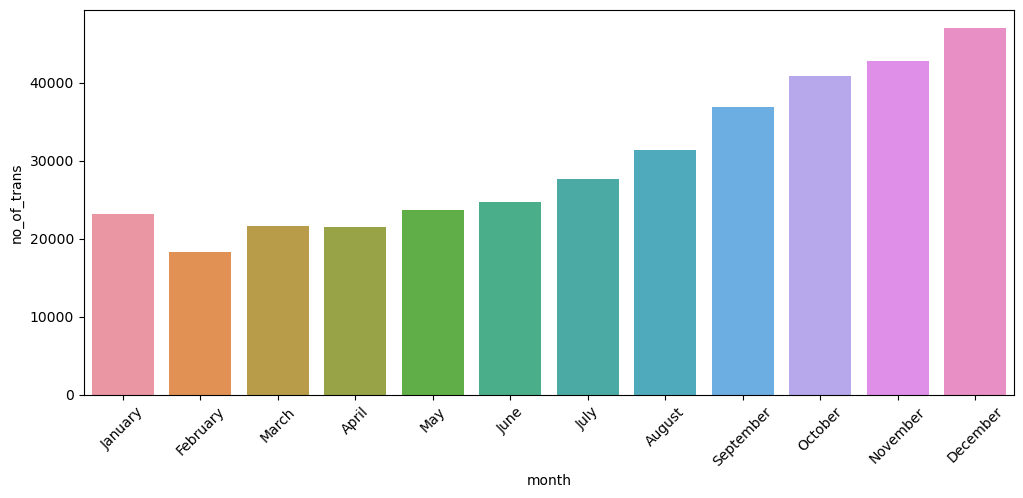

In [74]:
# Making a plot of month vs volume of transaction from the dataframe 
plt.figure(figsize=(12, 5))
sns.barplot(data=month_df, x='month', y='no_of_trans', order=['January', 'February', 'March', 
                                                              'April', 'May', 'June', 'July', 
                                                              'August', 'September', 'October', 
                                                              'November', 'December'])
plt.xticks(rotation=45);

#### Observations:
* There is a general trend of volume of transactions gradually increasing each month as the year approaches `December`
* `January`, however, experiences higher transaction volume than `February` despite the sharp decline from `December`

#### Cab Company

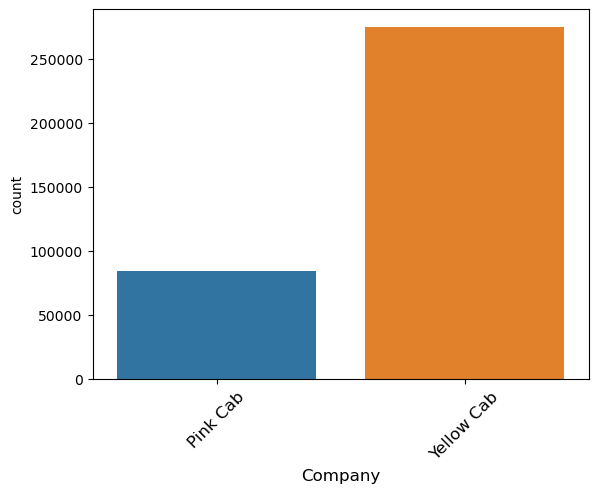

In [75]:
sns.countplot(data=df, x='Company');
plt.xlabel('Company', fontsize=12);
plt.xticks(rotation=45, fontsize=12);

#### Observations: 
* There are significantly more Yellow Cabs than Pink Cabs.
* This suggest that Yellow Cab is more active and common

#### City

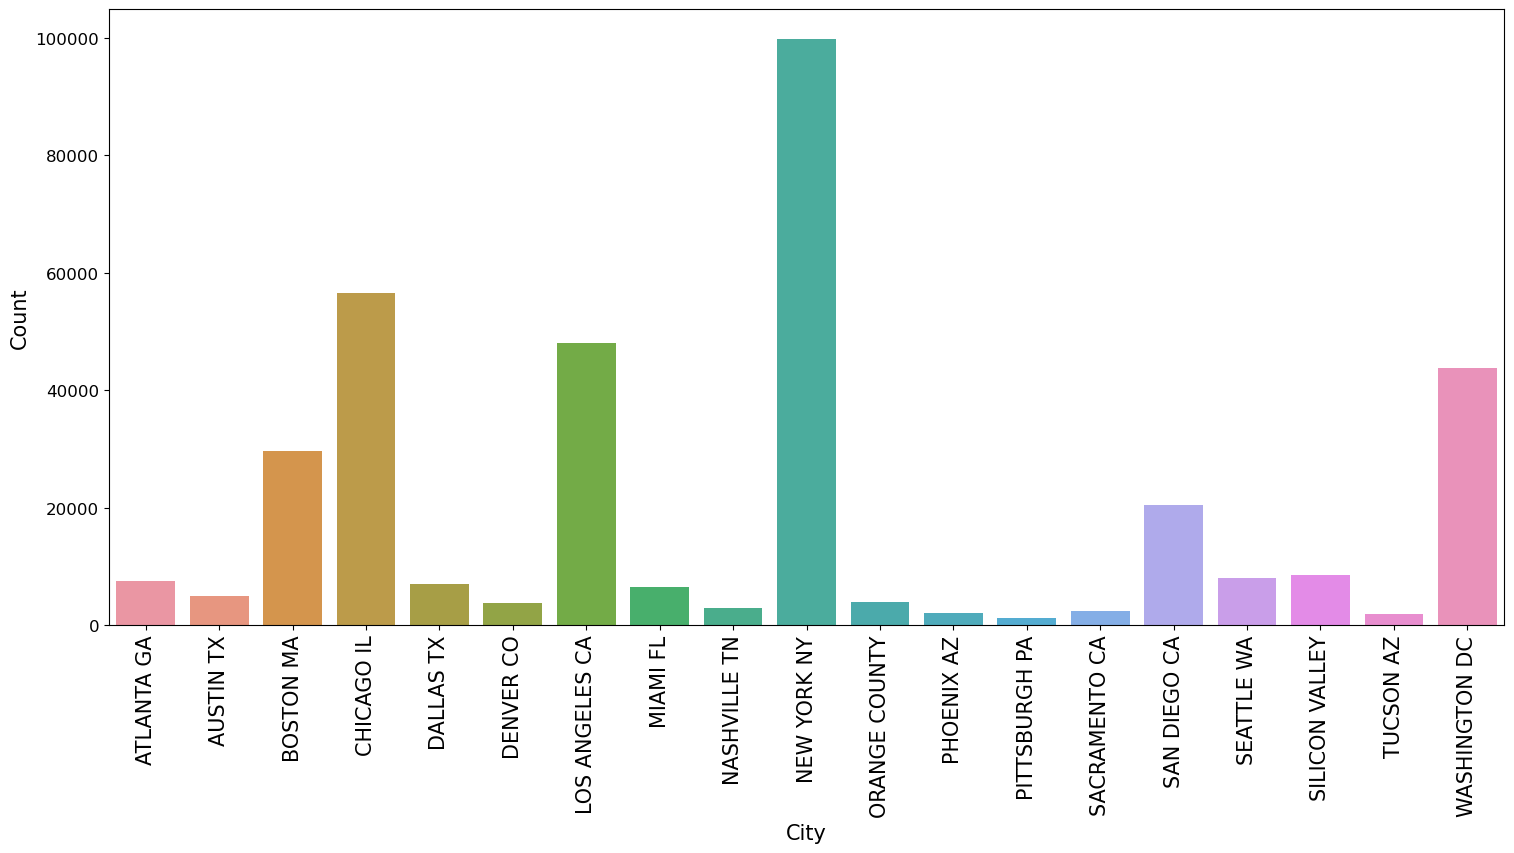

In [76]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='City')
plt.ylabel('Count', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=15)
plt.show();

In [77]:
# To check the contribution of the top 5 cities
df.City.value_counts(normalize=True).head()

NEW YORK NY      0.28
CHICAGO IL       0.16
LOS ANGELES CA   0.13
WASHINGTON DC    0.12
BOSTON MA        0.08
Name: City, dtype: float64

#### Observations:
* New York records the most number of transactions with almost 10,000 recorded
* Chicago and Los Angeles are a distant 2nd and 3rd
* Coming 4th and 5th are Washington DC and Boston
* These top 5 are responsible for 77% of all transactions in all 19 cities

#### Km Travelled

Observations:
 The median distance travelled is 22.44km
 75% of transactions cover at least 12.0km travel distance
 Most transactions do not go beyond 32.96km 75% of the time


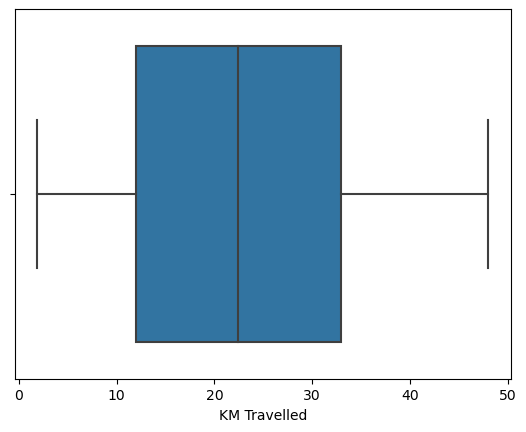

In [78]:
sns.boxplot(data=df, x='KM Travelled');
print('Observations:')
print(f' The median distance travelled is {df["KM Travelled"].median()}km')
print(f' 75% of transactions cover at least {df["KM Travelled"].quantile(0.25)}km travel distance')
print(f' Most transactions do not go beyond {df["KM Travelled"].quantile(0.75)}km 75% of the time')

* The maximum distance covered is 48km while the minimum is 1.9km

#### Price Charged

Observations:
 The median price charged is 386.36 while the average is 423.44
 75% of transactions are charged at least 206.44
 Most transactions are not charged more than 583.66


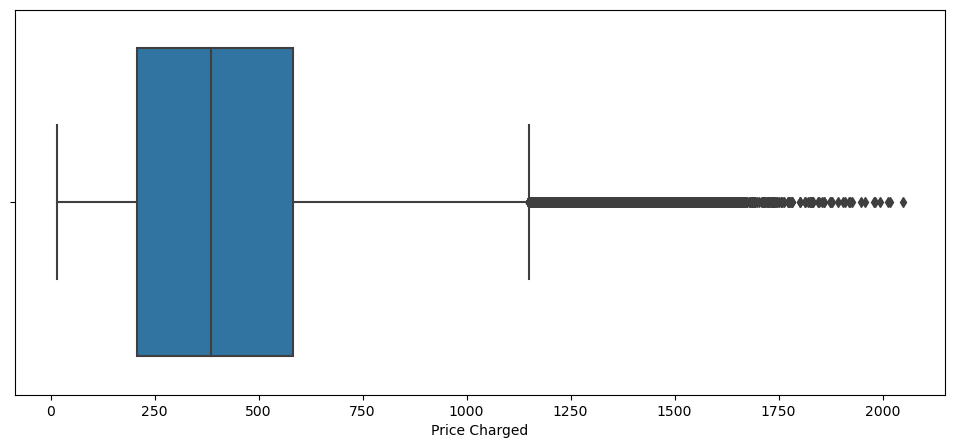

In [79]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Price Charged');
print('Observations:')
print(f' The median price charged is {df["Price Charged"].median()} while the average is {round(df["Price Charged"].mean(),2)}')
print(f' 75% of transactions are charged at least {round(df["Price Charged"].quantile(0.25),2)}')
print(f' Most transactions are not charged more than {round(df["Price Charged"].quantile(0.75),2)}')

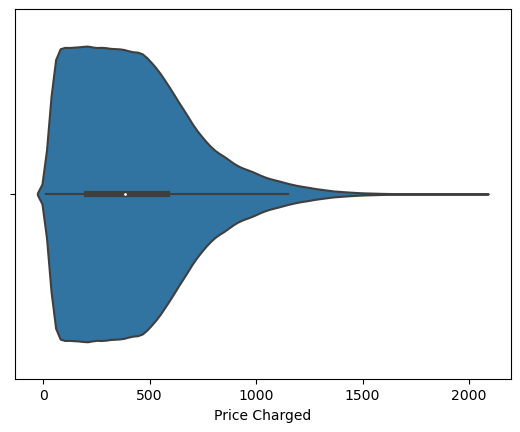

In [80]:
# To check distribution of values
sns.violinplot(data=df, x='Price Charged');

More Observations:
* There are outlier prices from about 1,130
* Distribution of datapoints does not suggest there is need for outlier treatment.

#### Cost of Trip

Observations:
 The median cost of trip is 282.48 while the average is 286.19
 75% of transactions are cost at least 151.2
 Most transactions do not cost more than 413.68


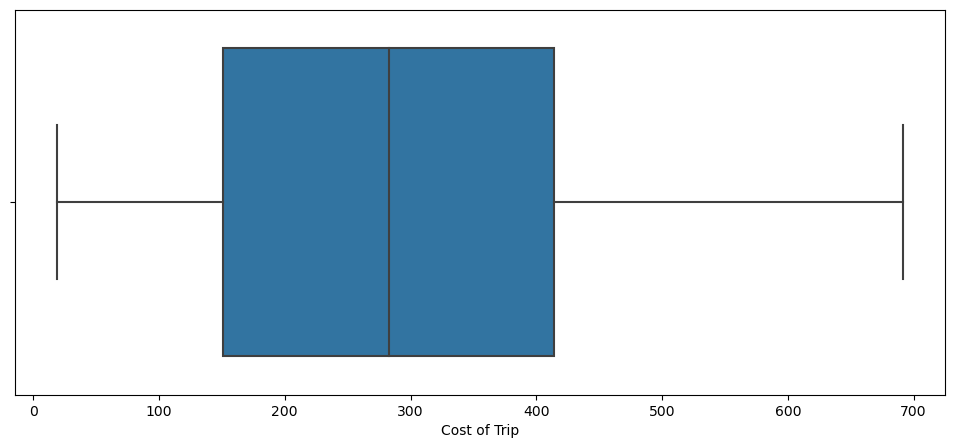

In [81]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Cost of Trip');
print('Observations:')
print(f' The median cost of trip is {df["Cost of Trip"].median()} while the average is {round(df["Cost of Trip"].mean(),2)}')
print(f' 75% of transactions are cost at least {round(df["Cost of Trip"].quantile(0.25),2)}')
print(f' Most transactions do not cost more than {round(df["Cost of Trip"].quantile(0.75),2)}')

#### Population

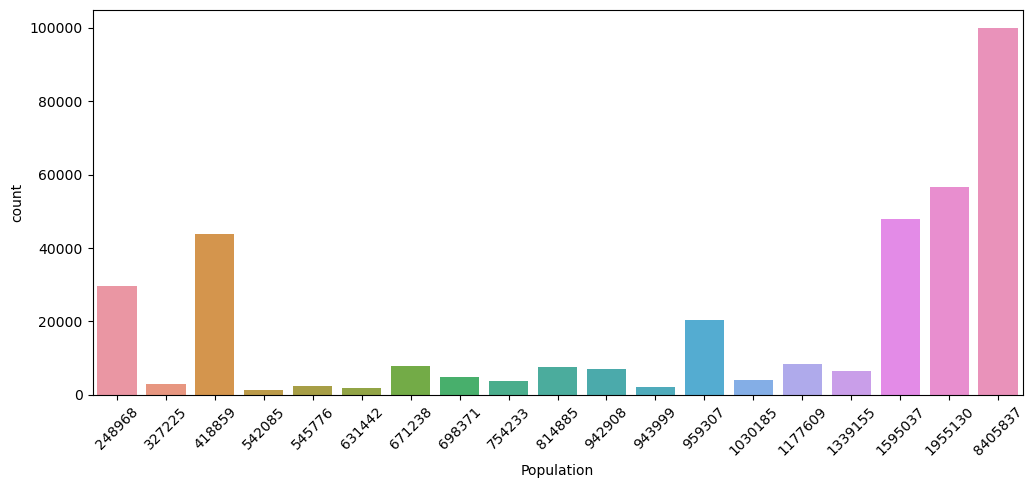

In [82]:
#df['Population'] = np.where(np.isinf(df['Population']), np.nan, df['Population'])
plt.figure(figsize=(12, 5))
sns.countplot(df, x='Population')
plt.xticks(rotation=45);

#### Observation:
* Cities with high population (population ≥800,000) appear to have significantly higher volume of transactions

In [83]:
# Age making a data of city population and volume of transaction
city_p = pd.DataFrame({'population':df.Population.value_counts(normalize=True).index,
                        'city':df.City.value_counts(normalize=True).index,
                         'no_of_trans':df.Population.value_counts().values,
                        '%age of trans':100*df.Population.value_counts(normalize=True).values})
city_p

,population,city,no_of_trans,%age of trans
0,8405837,NEW YORK NY,99885,27.79
1,1955130,CHICAGO IL,56625,15.76
2,1595037,LOS ANGELES CA,48033,13.37
3,418859,WASHINGTON DC,43737,12.17
4,248968,BOSTON MA,29692,8.26
5,959307,SAN DIEGO CA,20488,5.70
6,1177609,SILICON VALLEY,8519,2.37
7,671238,SEATTLE WA,7997,2.23
8,814885,ATLANTA GA,7557,2.10
9,942908,DALLAS TX,7017,1.95


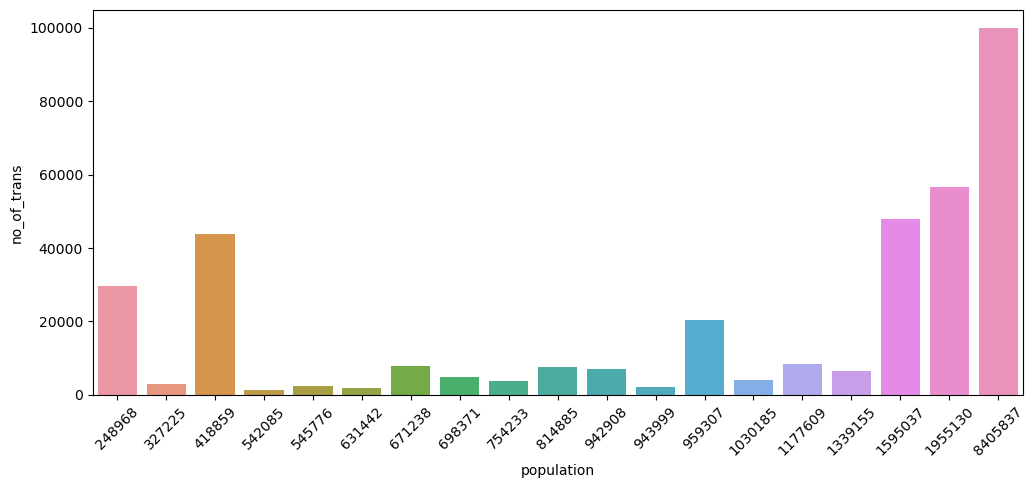

In [84]:
plt.figure(figsize=(12, 5))
sns.barplot(data=city_p, x='population', y='no_of_trans')
plt.xticks(rotation=45);

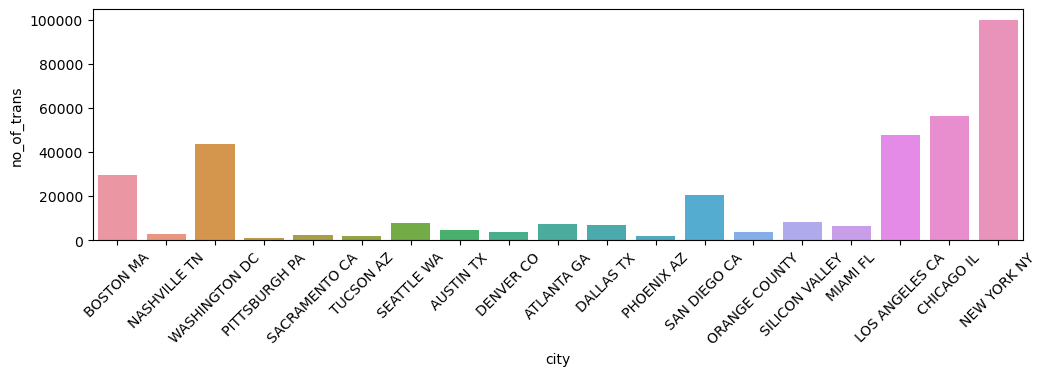

In [85]:
plt.figure(figsize=(12, 3))
sns.barplot(data=city_p.sort_values(by='population'), x='city', y='no_of_trans')
plt.xticks(rotation=45);

#### Observations:
* Generally, the number of transactions increase significantly with population for cities with population higher than 1.5 million people.
* There is much difference in the number of transactions for cities with population lower than 1.5 million people 
* Except `Washington DC`, `Boston MA` and `San Diego CA` have recorded significantly higher number of transactions than other cities with similar population size

#### Users

In [86]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,29290,Card,Male,28,10813,rain,No Holiday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,27703,Card,Male,27,9237,partly-cloudy-day,No Holiday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,814885,24701,28712,Cash,Male,53,11242,partly-cloudy-day,No Holiday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,814885,24701,28020,Cash,Male,23,23327,partly-cloudy-day,No Holiday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,814885,24701,27182,Card,Male,33,8536,partly-cloudy-day,No Holiday


In [87]:
# Making a dataframe of city users and volume of transaction
city_u = pd.DataFrame({'no_users':df.Users.value_counts(normalize=True).index,
                        'city':df.City.value_counts(normalize=True).index,
                         'no_of_trans':df.Users.value_counts().values,
                        '%age of trans':100*df.Users.value_counts(normalize=True).values})
city_u

,no_users,city,no_of_trans,%age of trans
0,302149,NEW YORK NY,99885,27.79
1,164468,CHICAGO IL,56625,15.76
2,144132,LOS ANGELES CA,48033,13.37
3,127001,WASHINGTON DC,43737,12.17
4,80021,BOSTON MA,29692,8.26
5,69995,SAN DIEGO CA,20488,5.70
6,27247,SILICON VALLEY,8519,2.37
7,25063,SEATTLE WA,7997,2.23
8,24701,ATLANTA GA,7557,2.10
9,22157,DALLAS TX,7017,1.95


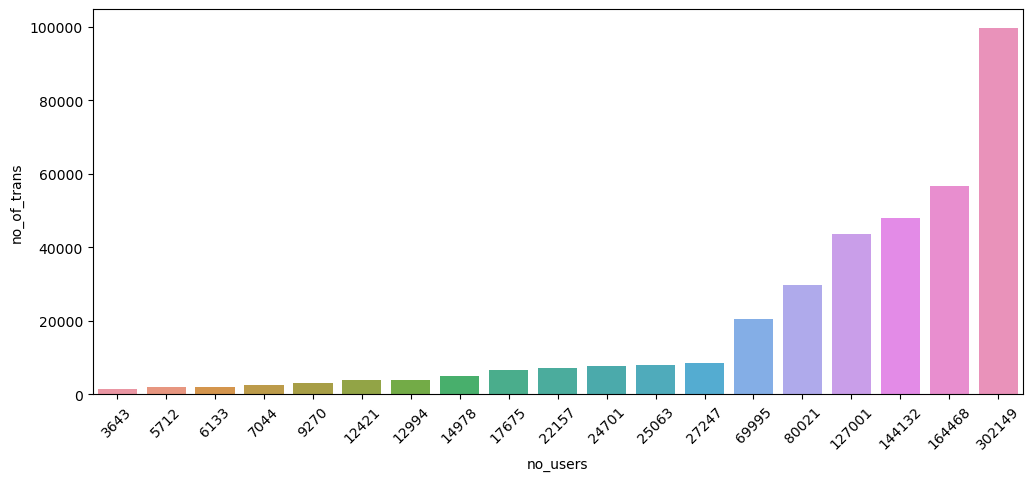

In [88]:
plt.figure(figsize=(12, 5))
sns.barplot(data=city_u, x='no_users', y='no_of_trans')
plt.xticks(rotation=45);

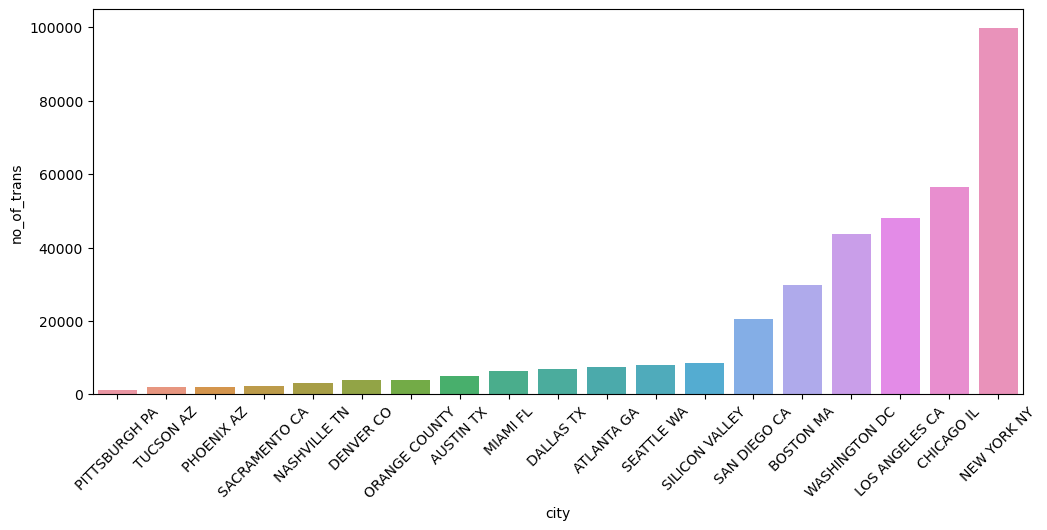

In [89]:
plt.figure(figsize=(12, 5))
sns.barplot(data=city_u.sort_values(by='no_users'), x='city', y='no_of_trans')
plt.xticks(rotation=45);

#### Observations:
* As it would be expected, the volume of transactions per city increase with the number of users per city
* Low population cities such as `Washington DC`, `Boston MA` and `San Diego CA` have a significantly higher number of users which explains the high volume of transactions

#### Payment_Mode

Card   59.96
Cash   40.04
Name: Payment_Mode, dtype: float64


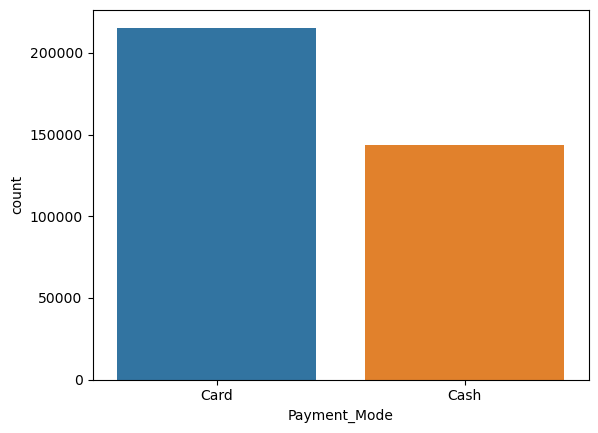

In [90]:
print(df.Payment_Mode.value_counts(normalize=True)*100)
sns.countplot(data=df, x='Payment_Mode');

In [91]:
df.Payment_Mode.value_counts(normalize=True)*100

Card   59.96
Cash   40.04
Name: Payment_Mode, dtype: float64

#### Observations:
* There are more transactions completed with card payments than with cash however,
* A significant number of transactions (40% of all transactions or 2 out of every 5 transactions) are settled with cash

#### Gender

Male     57.29
Female   42.71
Name: Gender, dtype: float64


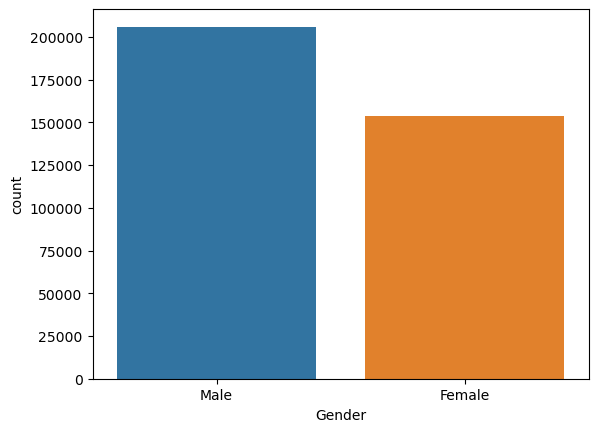

In [92]:
print(df.Gender.value_counts(normalize=True)*100)
sns.countplot(data=df, x='Gender');

#### Observations:
* 57% of all users are male while 43% of users are females

#### Age

In [93]:
# Checking the age limits
print(df.Age.min())
df.Age.max()

18


65

In [94]:
# Making a dataframe of age groups for wasy analysis
age_grp = pd.DataFrame({'age_group': ['below 29', '30-39', '40-49', '50-59', '60 & above'],
                        'vol_transactions': [df[ (df['Age']<30)]['Age'].count(),
                                             df[(df['Age']>=30) & (df['Age']<40)]['Age'].count(),
                                             df[(df['Age']>=40) & (df['Age']<50)]['Age'].count(),
                                             df[(df['Age']>=50) & (df['Age']<60)]['Age'].count(),
                                             df[(df['Age']>=60)]['Age'].count()]})
age_grp

,age_group,vol_transactions
0,below 29,138867
1,30-39,112735
2,40-49,47017
3,50-59,38087
4,60 & above,22686


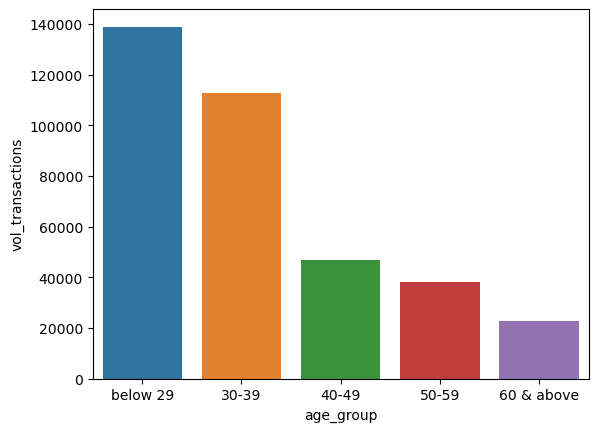

In [95]:
sns.barplot(data=age_grp, x='age_group', y='vol_transactions');

#### Observations:
* Generally, younger users tend to conduct more transactions
* The most active age groups are `18-29` and `30-39`

#### Income

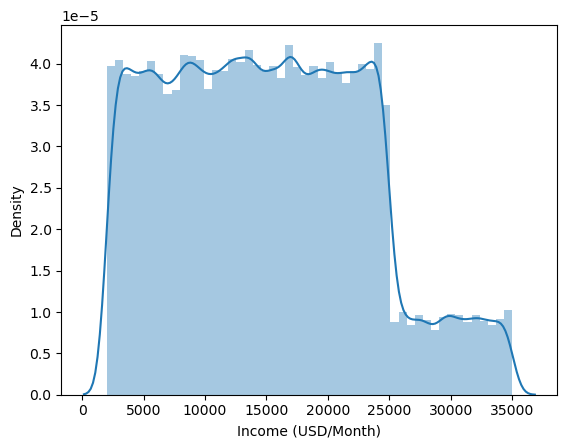

In [96]:
sns.distplot(df['Income (USD/Month)']);

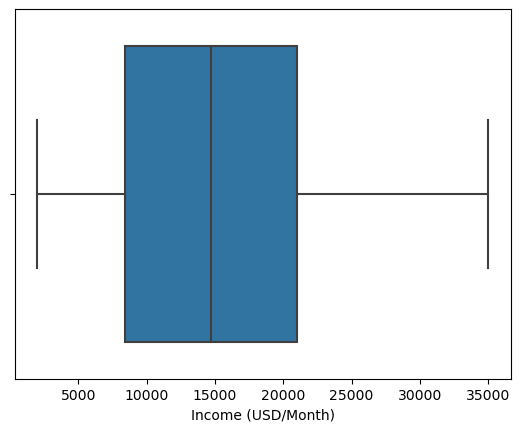

In [97]:
sns.boxplot(data=df, x='Income (USD/Month)');

In [98]:
# Checking the lowest and highest income
print(f'The highest income is {df["Income (USD/Month)"].max()} USD')
print(f'The lowest income is {df["Income (USD/Month)"].min()} USD')

The highest income is 35000 USD
The lowest income is 2000 USD


#### Observation:
* The volume of transactions is relatively the same for users with income between 2,000 and about 24,000
* The volume of transactions is relatively the same for users with income between 2,400 and about 35,000
* The volume of transactions for users with income between 2,000 and about 24,000 is at least 4 times more than the volume of transactions for users with income between 2,400 and about 35,000

#### Icon

rain                41.16
partly-cloudy-day   37.93
clear-day           15.26
snow                 3.25
cloudy               2.29
wind                 0.10
Name: Icon, dtype: float64


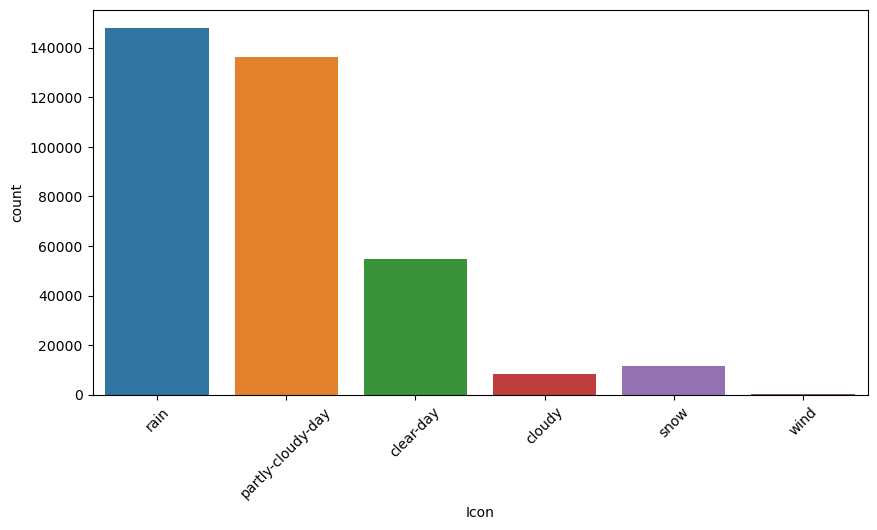

In [99]:
print(df.Icon.value_counts(normalize=True)*100)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Icon')
plt.xticks(rotation=45);

#### Observations:
* `rain` is the more common weather condiation occurring on 41% of the total number of days in review
* The next common are `partly-cloudy-day` and `clear-day` occurring on 38% and 15% of the days under review
* These 3 weather types account for 94% of all weather occurrences in the period under review

In [100]:
# Making a dataframe of holidays and their frequency
hol = pd.DataFrame({'holidays':df.Holiday.value_counts(normalize=True).index,
                         'no_of_days':df.Holiday.value_counts().values,
                        })
hol = hol.drop(0)
hol

,holidays,no_of_days
1,Thanksgiving (Day After),2396
2,Christmas Eve,2011
3,New Year's Eve,1780
4,Christmas day,1329
5,New Year's Day,1260
6,Thanksgiving,1166
7,Veterans Day,1012
8,Juneteenth National Independence,747
9,Labor Day,666
10,Columbus Day,459


In [101]:
hol['%age_of_ days'] = hol['no_of_days'] / hol['no_of_days'].sum() * 100
hol

,holidays,no_of_days,%age_of_ days
1,Thanksgiving (Day After),2396,15.78
2,Christmas Eve,2011,13.25
3,New Year's Eve,1780,11.73
4,Christmas day,1329,8.75
5,New Year's Day,1260,8.30
6,Thanksgiving,1166,7.68
7,Veterans Day,1012,6.67
8,Juneteenth National Independence,747,4.92
9,Labor Day,666,4.39
10,Columbus Day,459,3.02


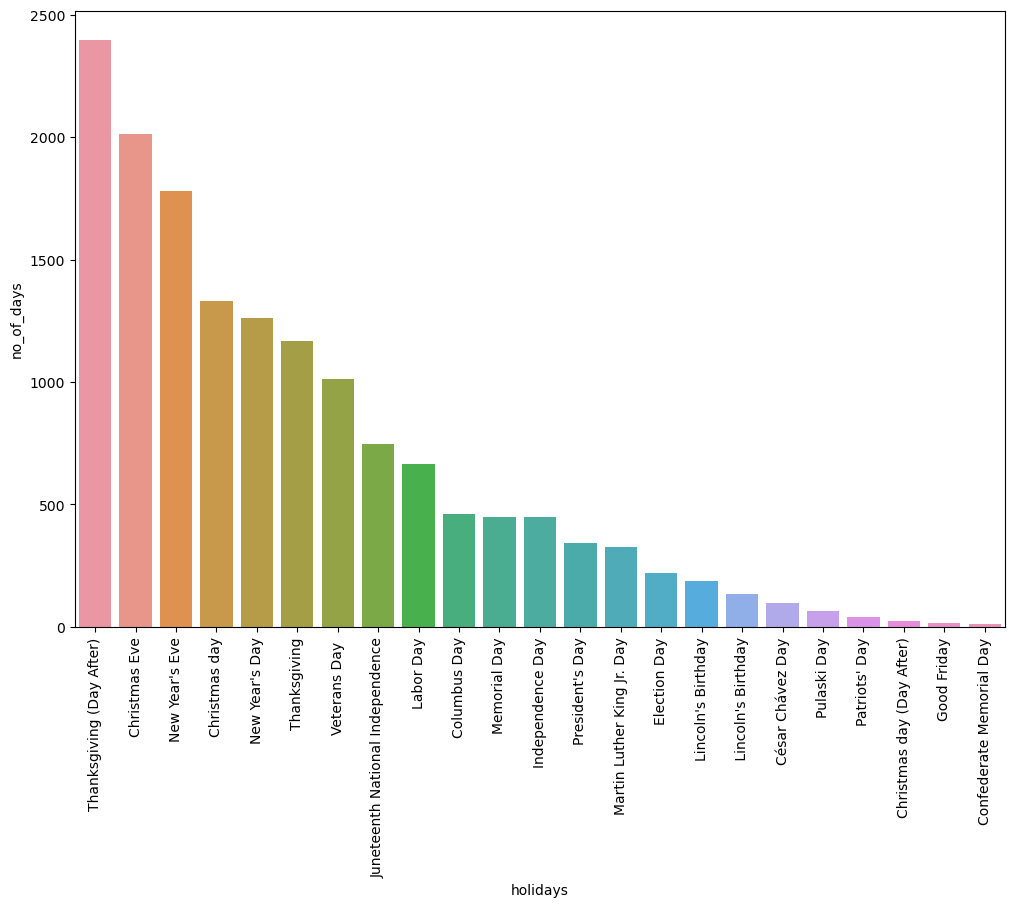

In [102]:

plt.figure(figsize=(12, 8))
sns.barplot(data=hol, x='holidays', y='no_of_days');
plt.xticks(rotation=90);

#### Observations:

* `Thanksgiving (Day After)` records the most volume of transactions in the time period with 15.78% of all transactions
* This is followed by `Christmas eve`, `New Year's Eve`, `christmas Day`, `New Year Day` and `Thanksgiving`. These are the most popular days people patronize the cab business
* `Confederate Memorial Day` and `Good Friday` are the least popular days among the public holidays

### Multivariate Analysis

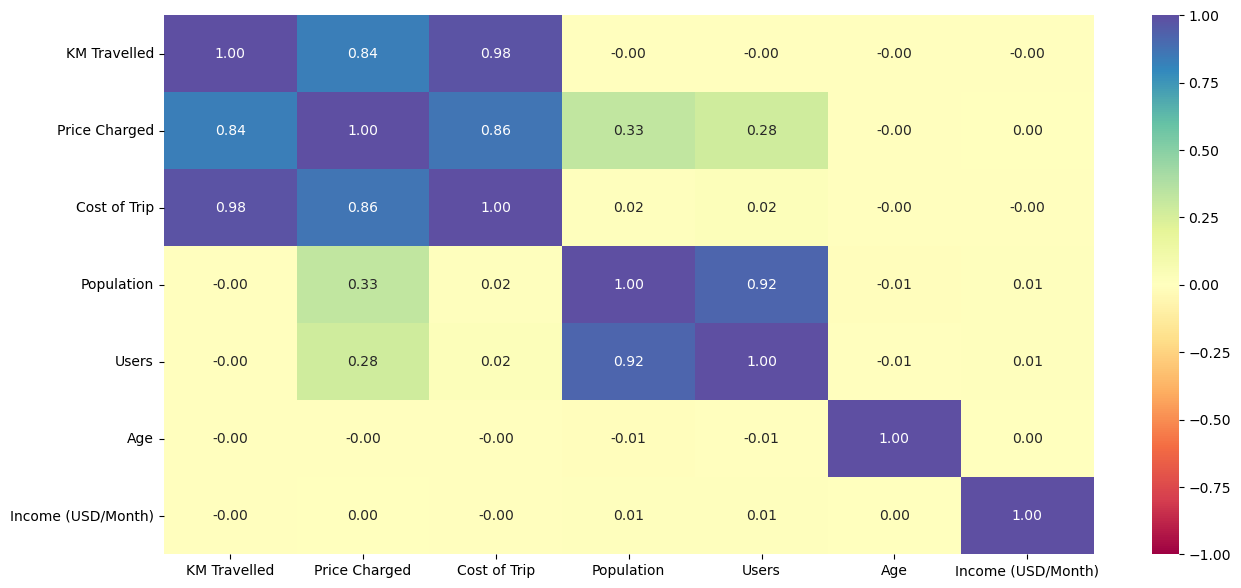

In [103]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping Transaction ID and Customer ID as they are unique identifiers
cols_list.remove( "Transaction ID")
cols_list.remove("Customer ID")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* `KM Travelled` correlates positively and strongly with `Price Charged` and `Cost of Trip`
* `Population` and `Users` are also strongly positively correlated
* `Population` and `Users` are positively correlated with `Price Charged` but not `Cost of Trip`
* There are virtually no other correlations

### Feature Engineering with Bivariate Analysis

<Axes: >

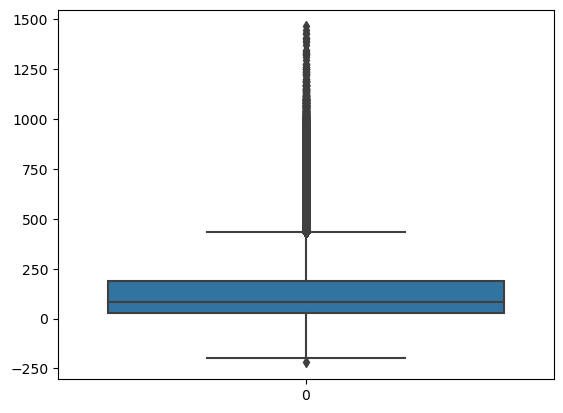

In [104]:
# Creating the Profit column
xf = df.copy()
xf['Profit'] = xf['Price Charged']-xf['Cost of Trip']
sns.boxplot(xf['Profit'])

In [105]:
# Calculating the highest loss

print('Observation:')
print(f'The highest loss is {round(xf["Profit"].min(),2)}USD')

# Calculating the number transactions with losses

print(f'The number of transactions with losses are {xf[xf["Profit"]<0]["Profit"].count()} which is {round((xf[xf["Profit"]<0]["Profit"].count()*100)/(xf["Profit"].shape[0]),2)}% of all transactions')
print('There are more transactions with profit many of which appear to outliers and will examined later')

Observation:
The highest loss is -220.06USD
The number of transactions with losses are 24819 which is 6.91% of all transactions
There are more transactions with profit many of which appear to outliers and will examined later


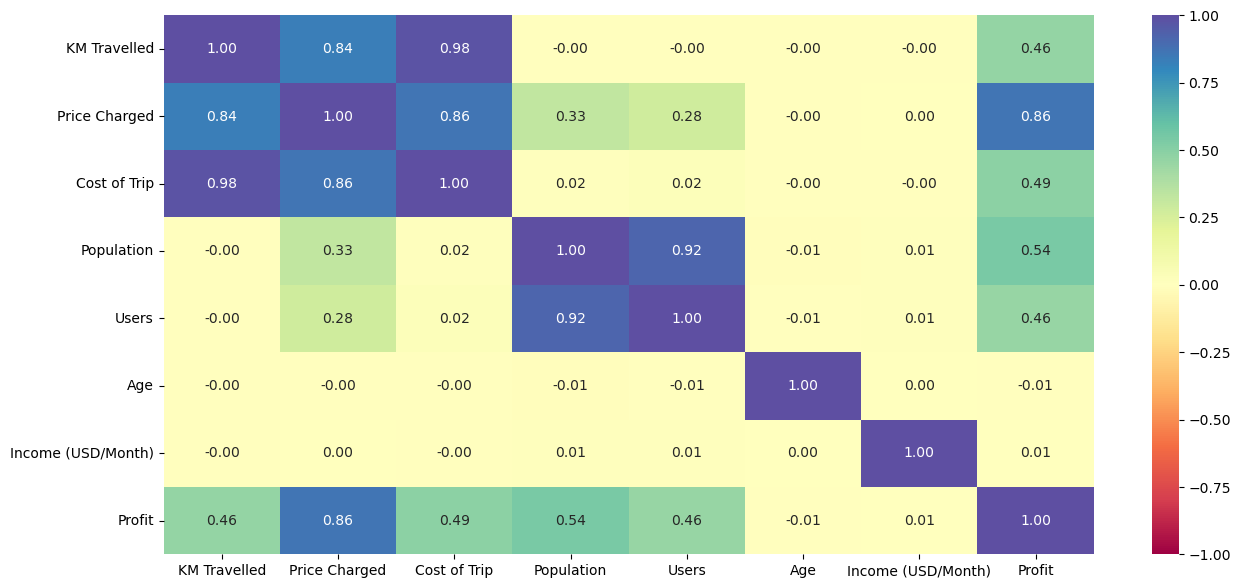

In [106]:
# Correlation plot of numerical variable 

cols_list = xf.select_dtypes(include=np.number).columns.tolist()
# dropping Transaction ID and Customer ID as they are unique identifiers
cols_list.remove( "Transaction ID")
cols_list.remove("Customer ID")

plt.figure(figsize=(15, 7))
sns.heatmap(
    xf[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* In addition to the earlier mentioned correlations new correlations have emerged
* As expected, `Profit` is positively correlated with `KM Travelled`, `Price Charged` and `Cost of Trip`
* Also positively correlated is `Profit` with `Population` and `Users`
* The strength of correlation of `Profit` with other features is in the order `Price Charged`, `Population`, `Cost of Trip`, `KM Travelled` and `Users`
* `Age` and `Income(USD\Month)` do not correlate with any other feature or with each other. They appear not to have any influence on the profits, revenue and costs involved in the cab industry

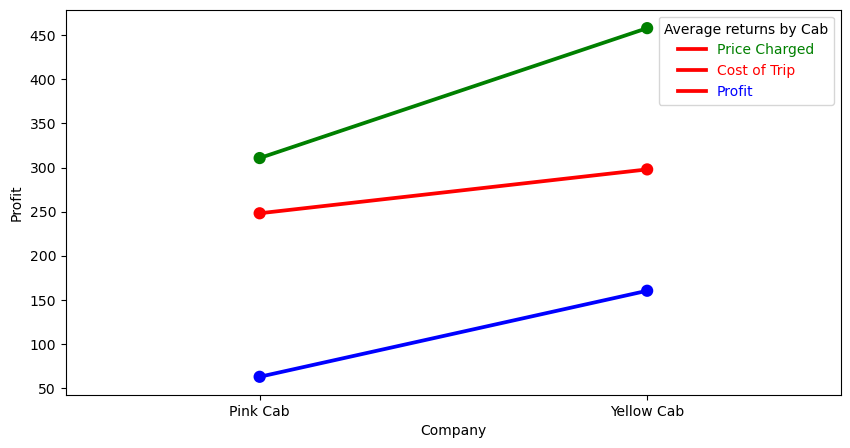

In [107]:
# Average cost, price and profit by company

plt.figure(figsize=(10,5));

sns.pointplot(data=xf, x='Company', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='Company', y='Price Charged', color='green')

sns.pointplot(data=xf, x='Company', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.show();

#### Observations:
* The average `Price Charged`, `Cost of Trip` and `Profit` for the Yellow cab company is higher than Pink cab company

<Figure size 1000x500 with 0 Axes>

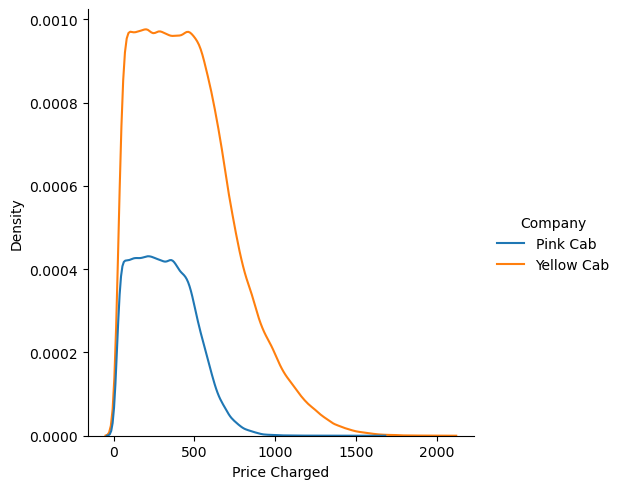

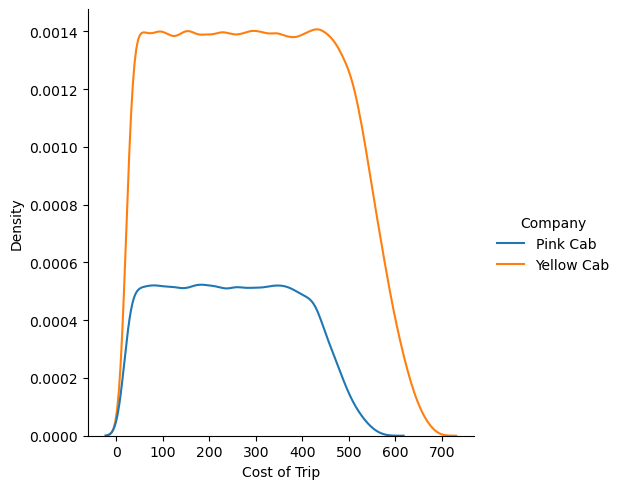

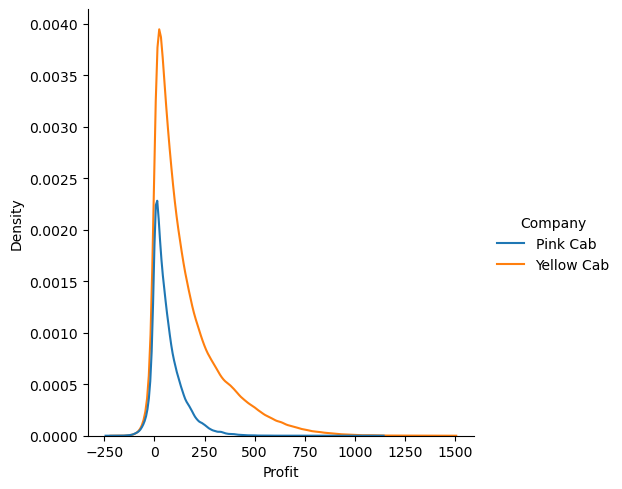

In [108]:
# Distribution analysis with hue
plt.figure(figsize=(10,5));

sns.displot(data=xf,x='Price Charged', kind='kde', hue='Company')

sns.displot(data=xf,x='Cost of Trip', kind='kde', hue='Company')

sns.displot(data=xf,x='Profit', kind='kde', hue='Company')

plt.show();

#### Observations:

* The plots show that there is more variability in `Profit`, `Price Charged` and `Cost of Trip` for Yellow cab than Pink cab
* Also observable from the plots is that there more Yellow cabs with higher `Profit`, `Price Charged` and `Cost of Trip` than Pink cabs. The difference is more pronounced in `Price Charged` and `Cost of Trip` than `Profit`

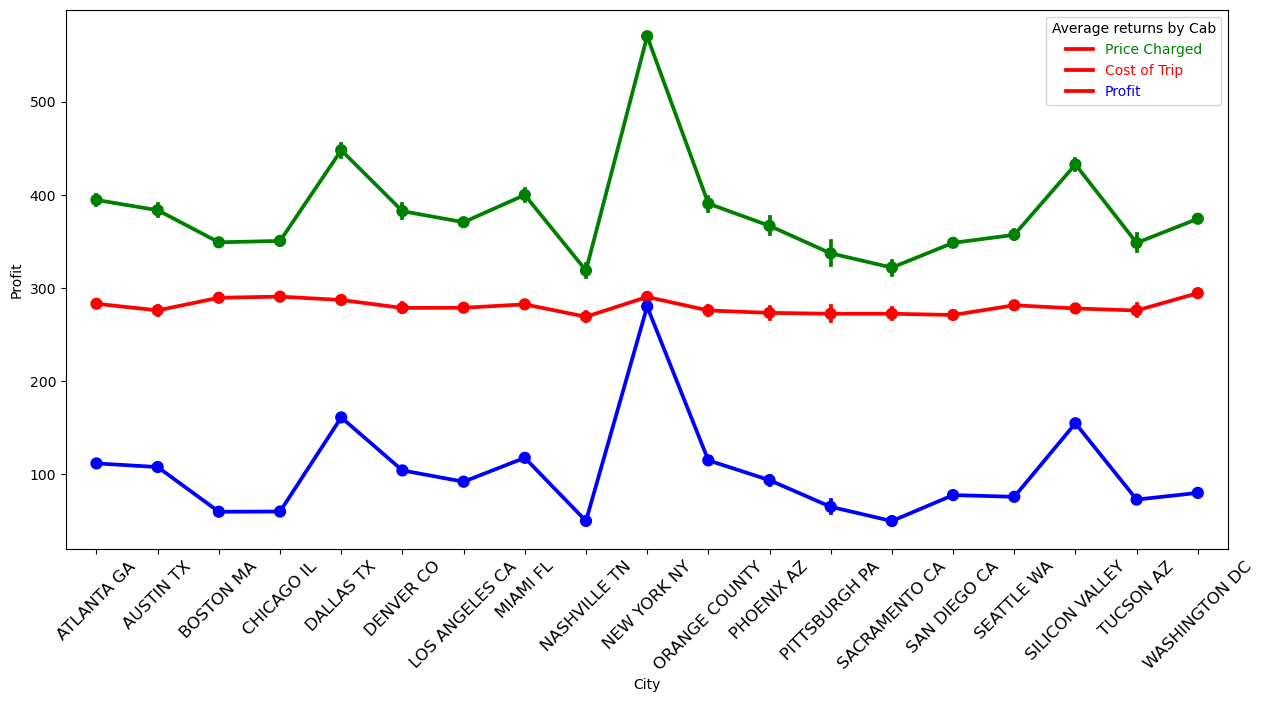

In [109]:
# Average cost, price and profit by city

plt.figure(figsize=(15,7));

sns.pointplot(data=xf, x='City', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='City', y='Price Charged', color='green')

sns.pointplot(data=xf, x='City', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=45, fontsize=12)

plt.show();

#### Observations:
* There is little or very low variability in the `Cost of Trip` from city to city. However, Washington DC has a slightly but significantly higher `Cost of Trip` than other cities
* There is more variability in the `Profit` and `Price Charged` from city to city with `New York NY` having significantly higher `Profit` and `Price Charged` than other cities
* Also performing well in `Profit` and `Price Charged` are `Dallas TX` and `Silicon Valley`
* The least performing cities by `Profit` and `Price Charged` are `Nashville TN` and `Pittsburgh PA`

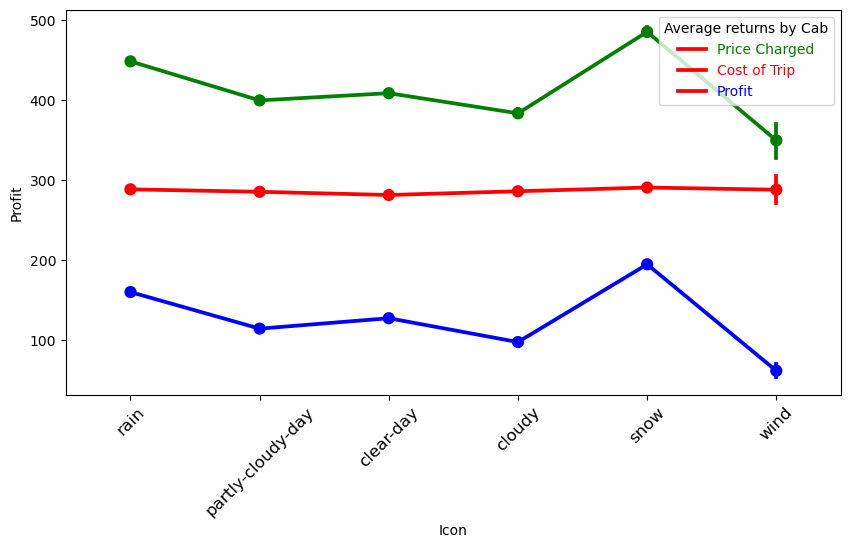

In [110]:
# Average cost, price and profit by Icon

plt.figure(figsize=(10,5));

sns.pointplot(data=xf, x='Icon', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='Icon', y='Price Charged', color='green')

sns.pointplot(data=xf, x='Icon', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=45, fontsize=12)

plt.show();

#### Observations:
* While the `Profit` and `Price Charged` vary with the weather the `Cost of Trip` hardly change
* The `Profit` and `Price Charged` is highest with *snow* and *rain* respectively 
* The `Profit` and `Price Charged` is lowest for a *windy* day
* The disributions of `Profit`, `Price Charged` and `Cost of Trip` on *wind* days are  normal unlike all other observations which have non-normal distribution 

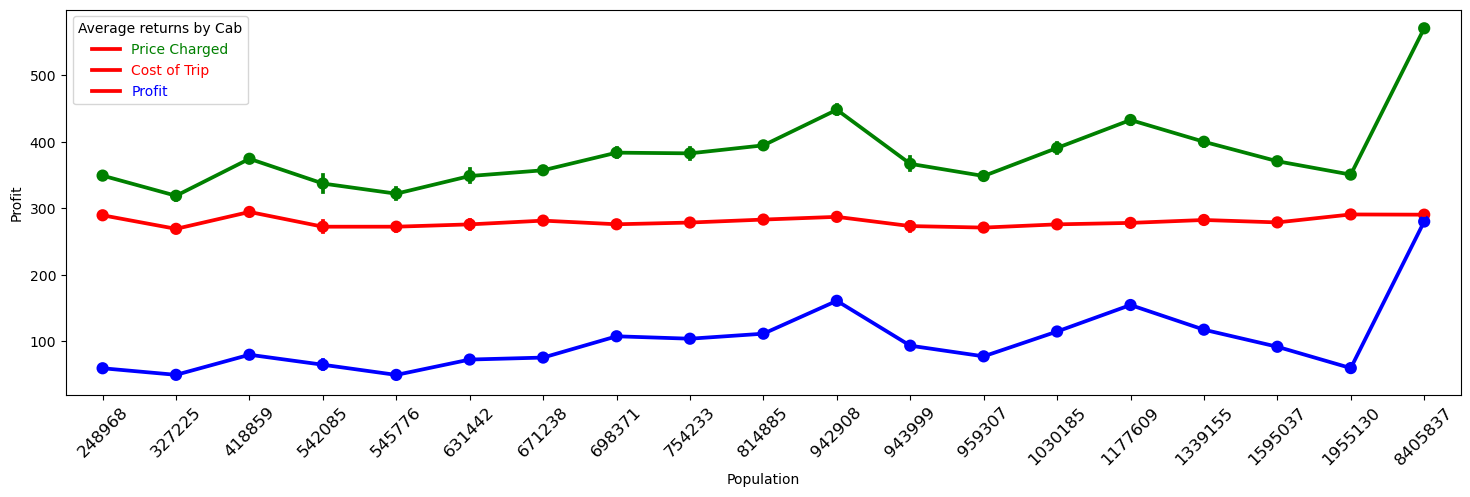

In [111]:
# Average cost, price and profit by Population

plt.figure(figsize=(18,5));

sns.pointplot(data=xf, x='Population', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='Population', y='Price Charged', color='green')

sns.pointplot(data=xf, x='Population', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=45, fontsize=12)

plt.show();

#### Observations:
* As observed before there is much variability in `Cost of Trip` as the `Population` increase
* Although there is more variability with `Profit` and `Price Charged` it does not always increase with `Population`
* The two cities with the least `Profit` and `Price Charged` are the second least populated and the second highest populated cities in the data
* The trend is negative for second(2nd) to the fifth(5th) most populated cities in the data

In [112]:
# Creating a categories of age groups

# Create a list of age groups
bins = [0, 30, 40, 50, 60, np.inf]
labels = ['<30', '30-39', '40-49', '50-59', '60+']

# Convert the age column to a categorical column
xf['age_group'] = pd.cut(xf['Age'], bins=bins, labels=labels)

xf.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Icon,Holiday,Profit,age_group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,29290,Card,Male,28,10813,rain,No Holiday,57.31,<30
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,27703,Card,Male,27,9237,partly-cloudy-day,No Holiday,23.67,<30


<Axes: xlabel='age_group', ylabel='count'>

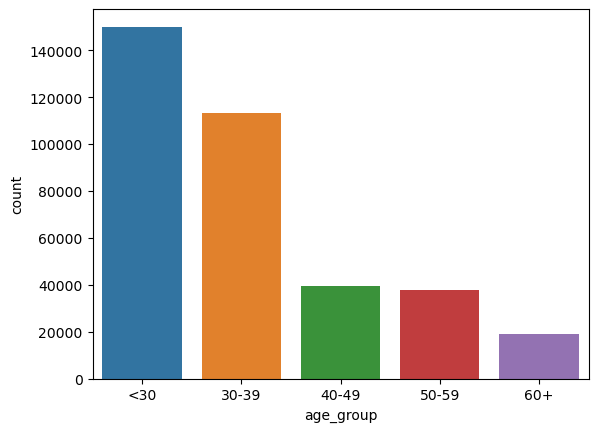

In [113]:
sns.countplot(data=xf, x='age_group')

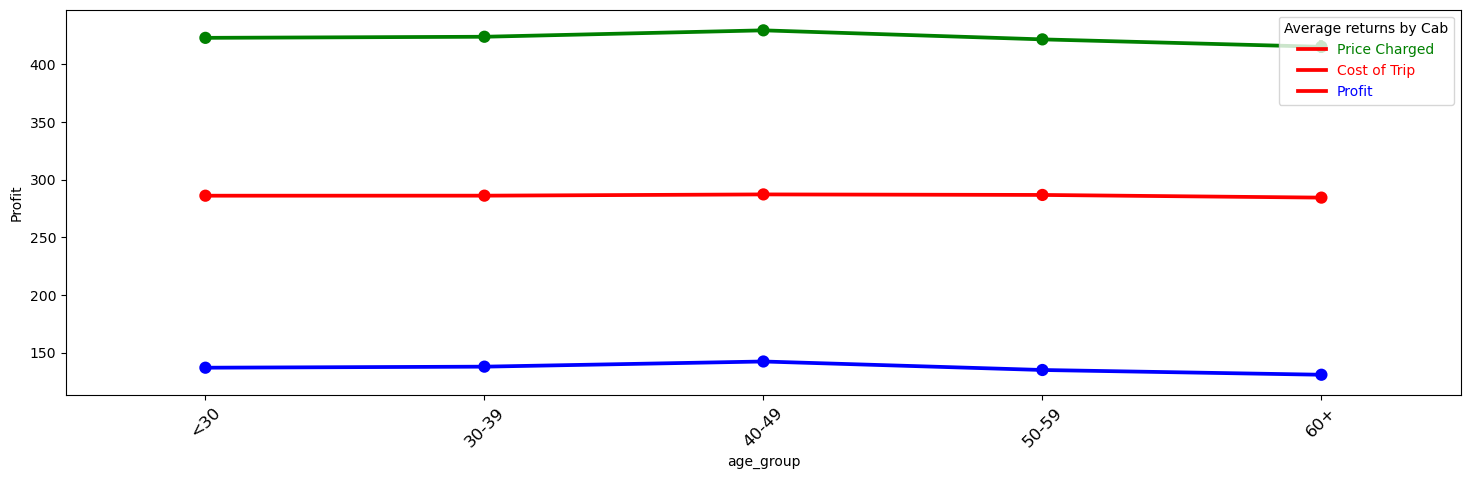

In [114]:
# Average cost, price and profit by age group

plt.figure(figsize=(18,5));

sns.pointplot(data=xf, x='age_group', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='age_group', y='Price Charged', color='green')

sns.pointplot(data=xf, x='age_group', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=45, fontsize=12)

plt.show();

<Figure size 1000x500 with 0 Axes>

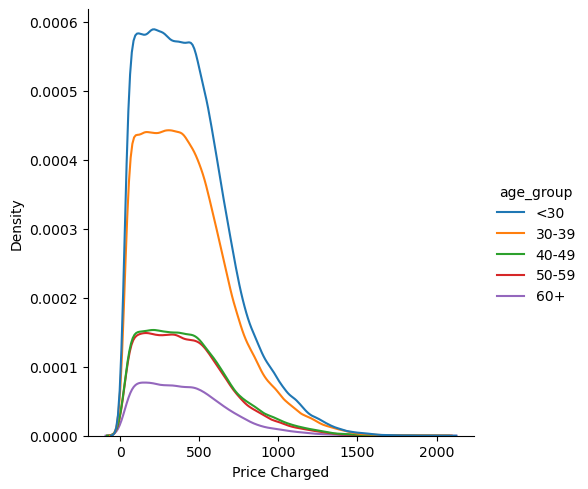

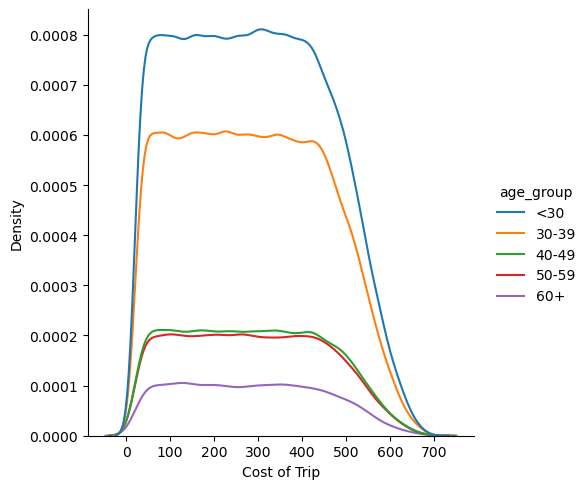

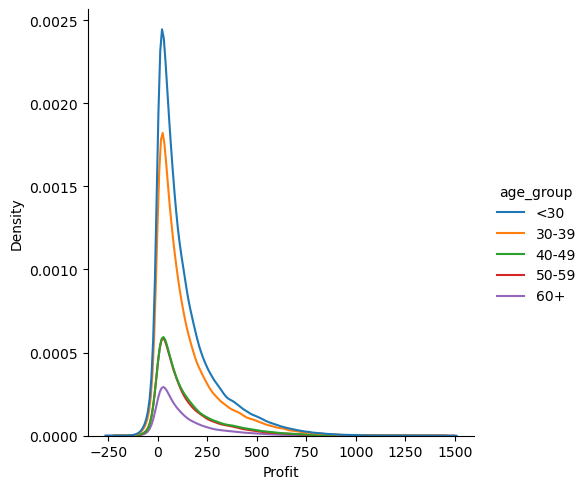

In [115]:
plt.figure(figsize=(10,5));

sns.displot(data=xf,x='Price Charged', kind='kde', hue='age_group')

sns.displot(data=xf,x='Cost of Trip', kind='kde', hue='age_group')

sns.displot(data=xf,x='Profit', kind='kde', hue='age_group')

plt.show();

#### Observation:
* There is no difference in pattern across the age groups in the pointplot
* And the overall pattern in terms of volume by age group for each feature is as observed in the univariate analysis. The bulk of the transactions are conducted by customers below 40 years of age

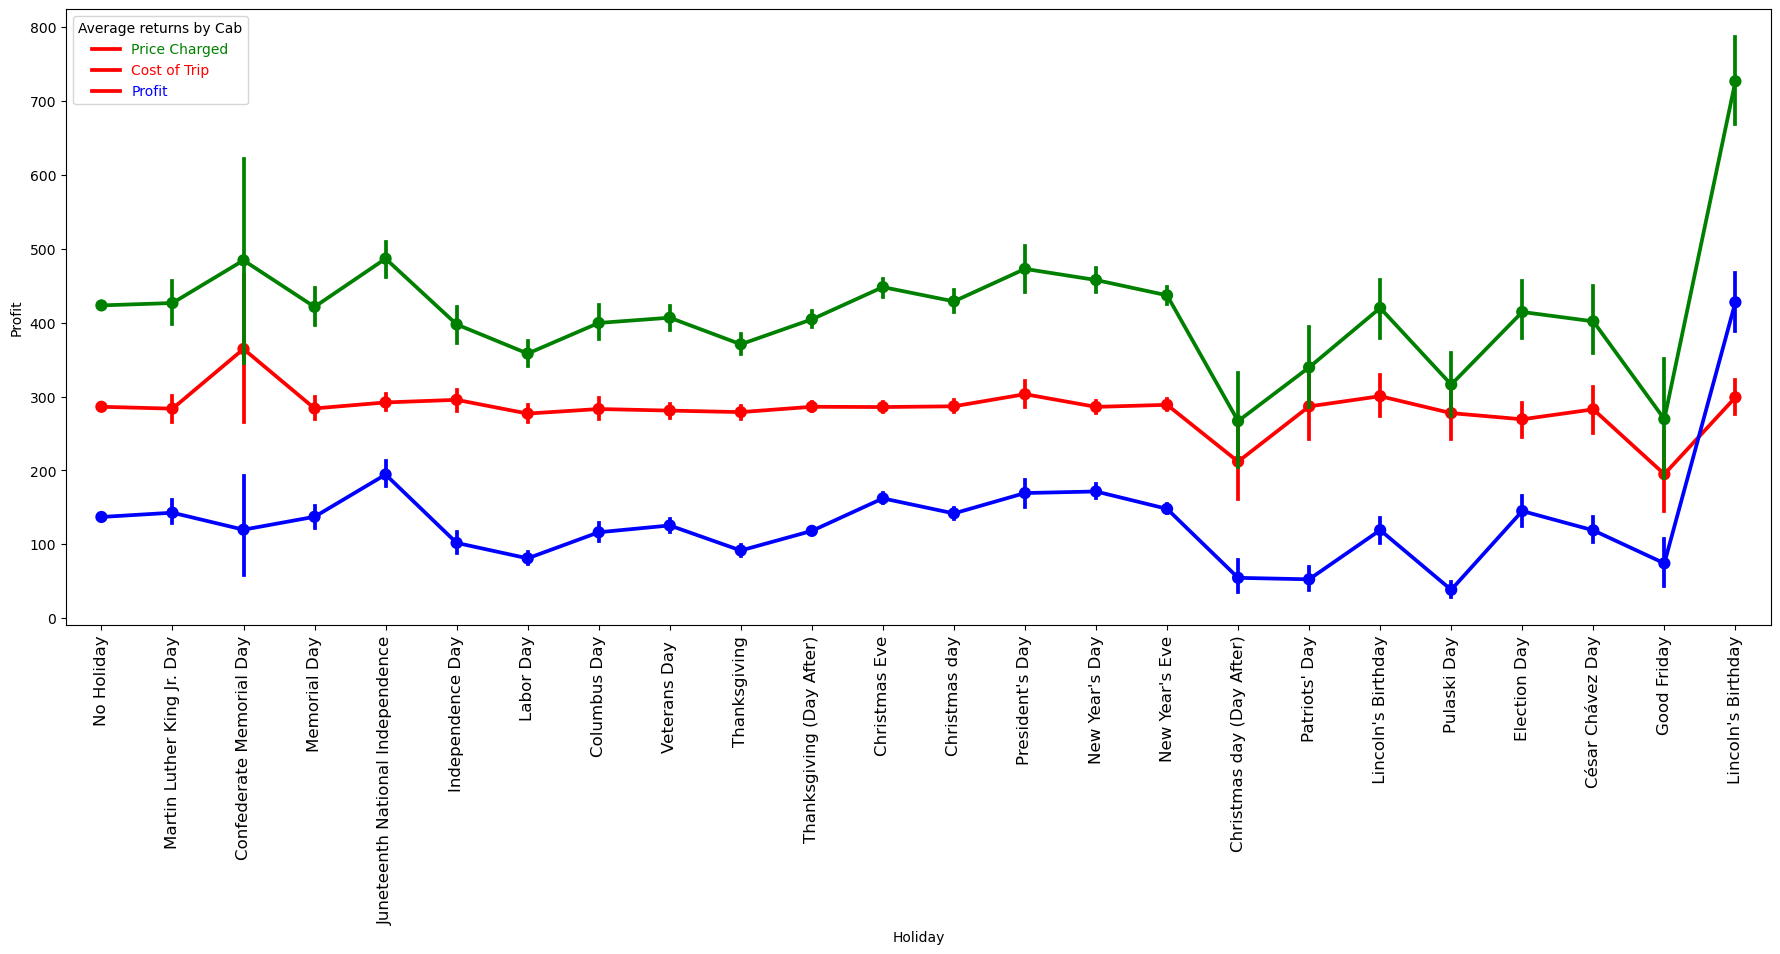

In [116]:
# Average cost, price and profit by Holiday

plt.figure(figsize=(22,8));

sns.pointplot(data=xf, x='Holiday', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='Holiday', y='Price Charged', color='green')

sns.pointplot(data=xf, x='Holiday', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=90, fontsize=12)

plt.show();

#### Observations:
* A significant number of holidays have `Price Charged` and `Profit` lower than the average of non-holiday days
* Most holidays have similar `Cost of Trip` as non-holiday days except for *Confederate Day* which have the highest `Cost of Trip` and *Good Fridays* and *Christmas day (Day After)* which have the lowest.
* *Lincoln's Birthday* returns the most `Price Charged` and `Profit` of all the holidays while *Christmas day (Day After)* returns the least 
* *Lincoln's Birthday* is represented twice on the plot. The error entry will be corrected below

In [117]:
# To identify the varying entries of the holiday Lincoln's Birthday
xf[xf['Holiday'].str.contains("Lincoln's Birthday")]['Holiday'].value_counts()

Lincoln's Birthday     186
 Lincoln's Birthday    133
Name: Holiday, dtype: int64

In [118]:
# To identify the different entry of "Lincoln's Birthday"
xf[(xf['Holiday'].str.contains("Lincoln's Birthday"))&(xf['Holiday']!="Lincoln's Birthday")]['Holiday'].unique().tolist()

["\xa0Lincoln's Birthday"]

In [119]:
# To replace the error entry with the correct entry
xf = xf.replace({"\xa0Lincoln's Birthday": "Lincoln's Birthday"})

In [120]:
# To check the value counts of the entries of the holiday Lincoln's Birthday
xf[xf['Holiday'].str.contains("Lincoln's Birthday")]['Holiday'].value_counts()

Lincoln's Birthday    319
Name: Holiday, dtype: int64

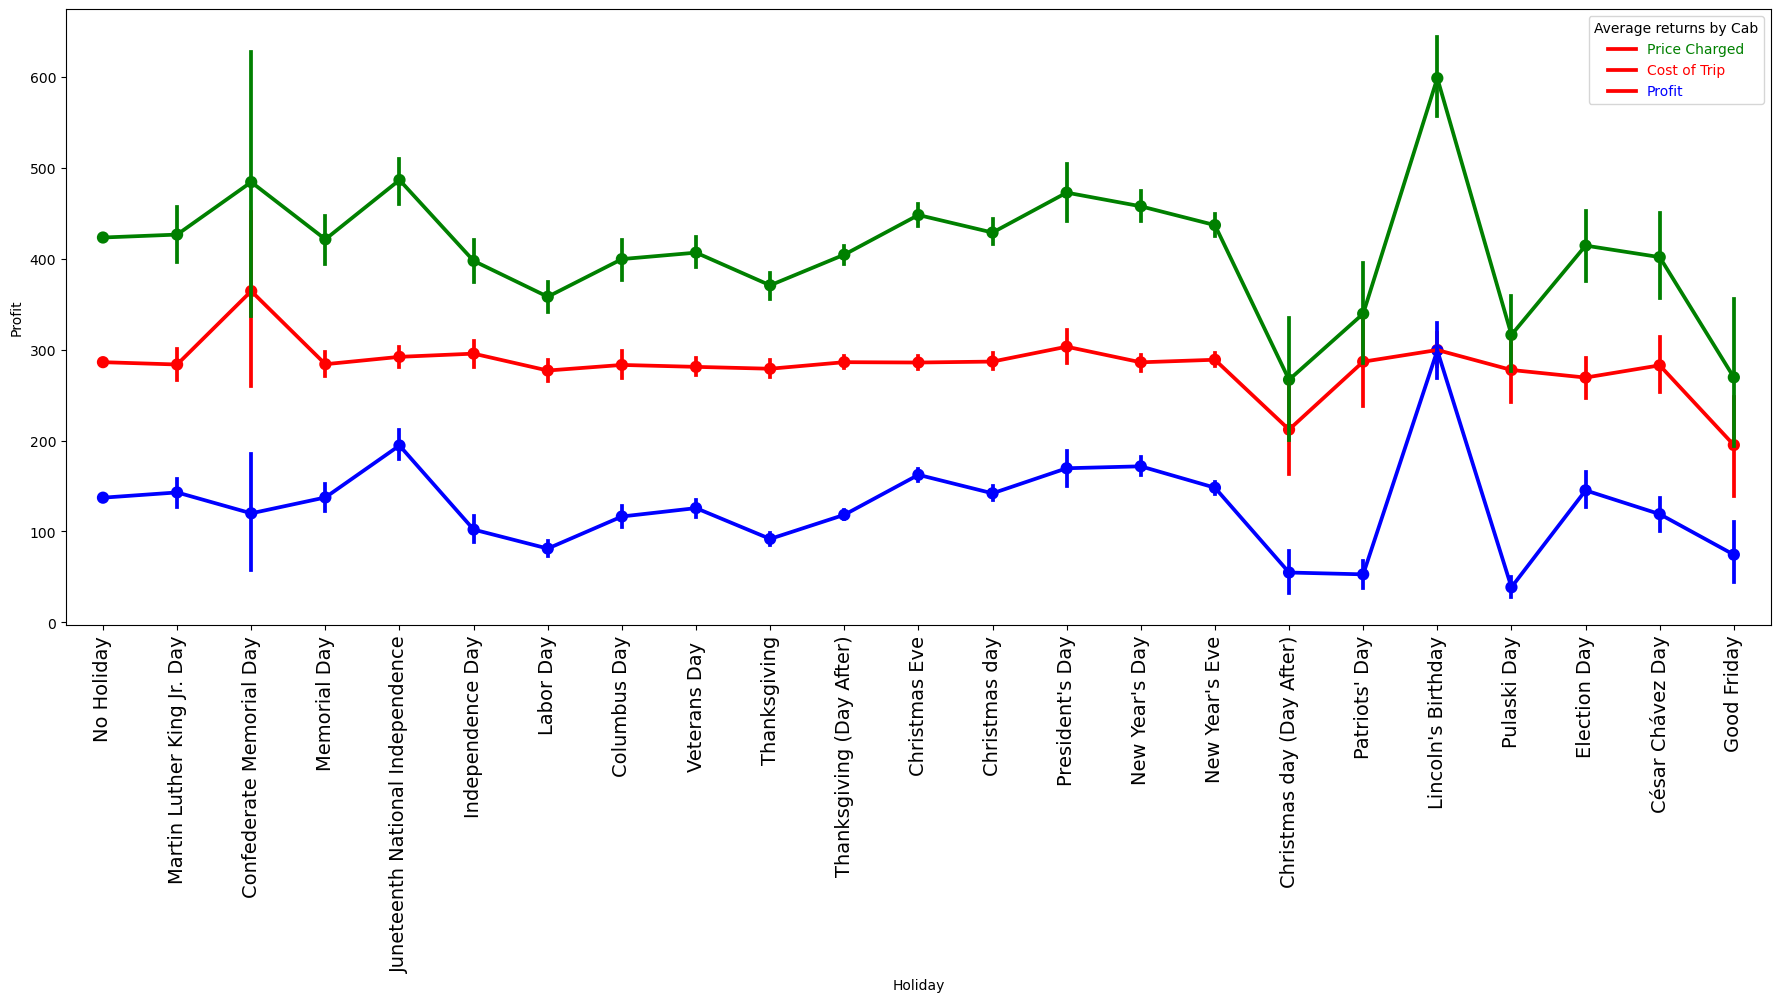

In [121]:
# Average cost, price and profit by Holiday

plt.figure(figsize=(22,8))

sns.pointplot(data=xf, x='Holiday', y='Cost of Trip', color='red')

sns.pointplot(data=xf, x='Holiday', y='Price Charged', color='green')

sns.pointplot(data=xf, x='Holiday', y='Profit', color='blue')

plt.legend(loc='best', title='Average returns by Cab', labels=['Price Charged', 'Cost of Trip', 'Profit'], 
           labelcolor=['green', 'red', 'blue'])

plt.xticks(rotation=90, fontsize=14)

plt.show();

#### Observations:

* After the entry correction *Lincoln's Birthday* is still the most profitable and generates the highest average price charged
* Other observations remain unchanged

In [122]:
# Gender analysis
profit_by_gender = pd.DataFrame(data=xf.groupby('Gender', as_index=True).sum()[['Profit']].sort_values('Profit', ascending=False).reset_index())
profit_by_gender

,Gender,Profit
0,Male,28865751.15
1,Female,20461950.34


Male     0.57
Female   0.43
Name: Gender, dtype: float64


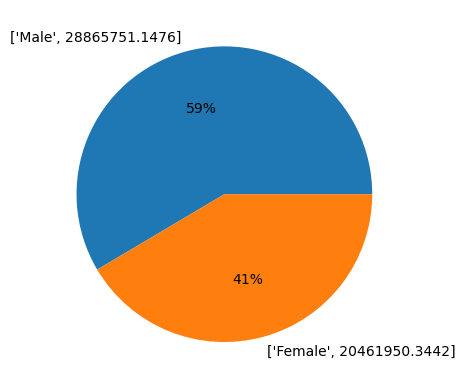

In [123]:
# Profit by Gender analysis
keys = profit_by_gender.values.tolist()

plt.pie(profit_by_gender['Profit'], labels=keys, autopct='%.0f%%')

print(xf['Gender'].value_counts(normalize=True))
plt.show()

#### Observations:
* Males generate slightly higher percentage of the profit than thier population proportion 
* More data is needed to measure the significance of this difference

In [124]:
# Age-group/profit analysis analysis
profit_by_agegrp = pd.DataFrame(data=xf.groupby('age_group', as_index=True).sum()[['Profit']].sort_values('Profit', ascending=False).reset_index())
profit_by_agegrp

,age_group,Profit
0,<30,20539909.88
1,30-39,15587448.55
2,40-49,5630551.76
3,50-59,5096253.22
4,60+,2473538.08


<30     0.42
30-39   0.31
40-49   0.11
50-59   0.11
60+     0.05
Name: age_group, dtype: float64


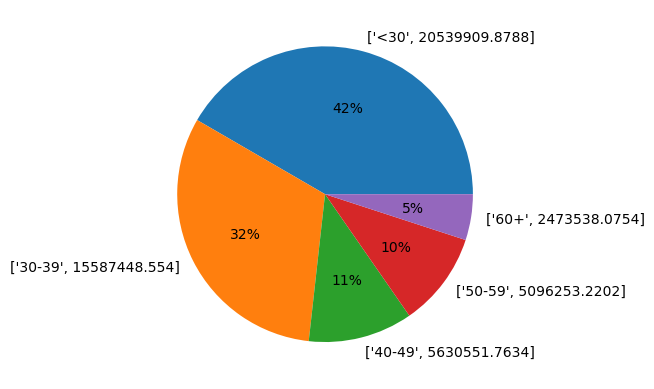

In [125]:
# Profit by Age group analysis
keys = profit_by_agegrp.values.tolist()

plt.pie(profit_by_agegrp['Profit'], labels=keys, autopct='%.0f%%')

print(xf['age_group'].value_counts(normalize=True))
plt.show()

#### Observations:
* There is no significanct effect of age demographics on profit

In [126]:
# Calculating the high whisker of boxplot of Profit

q25 = np.percentile(xf['Profit'], 25)

q75 = np.percentile(xf['Profit'], 75)

iqr = q75 - q25

high_whisker = q75 + 1.5 * iqr

print(round(high_whisker,2))

433.06


In [127]:
# Gender analysis of highly profitable transactions

print(xf['Gender'].value_counts(normalize=True)*100)
xf[xf['Profit']>high_whisker]['Gender'].value_counts(normalize=True)*100

Male     57.29
Female   42.71
Name: Gender, dtype: float64


Male     60.48
Female   39.52
Name: Gender, dtype: float64

#### Observations:
* There is a higher likelihood of men conducting a high profit transaction 

In [128]:
# City analysis of highly profitable transactions

print(xf['City'].value_counts(normalize=True)*100)
xf[xf['Profit']>high_whisker]['City'].value_counts(normalize=True)*100

NEW YORK NY      27.79
CHICAGO IL       15.76
LOS ANGELES CA   13.37
WASHINGTON DC    12.17
BOSTON MA         8.26
SAN DIEGO CA      5.70
SILICON VALLEY    2.37
SEATTLE WA        2.23
ATLANTA GA        2.10
DALLAS TX         1.95
MIAMI FL          1.80
AUSTIN TX         1.36
ORANGE COUNTY     1.11
DENVER CO         1.06
NASHVILLE TN      0.84
SACRAMENTO CA     0.66
PHOENIX AZ        0.57
TUCSON AZ         0.54
PITTSBURGH PA     0.37
Name: City, dtype: float64


NEW YORK NY      90.55
DALLAS TX         1.90
LOS ANGELES CA    1.65
SILICON VALLEY    1.65
MIAMI FL          0.69
ORANGE COUNTY     0.59
ATLANTA GA        0.51
WASHINGTON DC     0.49
CHICAGO IL        0.47
DENVER CO         0.35
AUSTIN TX         0.34
SAN DIEGO CA      0.21
SEATTLE WA        0.17
PHOENIX AZ        0.14
PITTSBURGH PA     0.08
BOSTON MA         0.06
TUCSON AZ         0.06
SACRAMENTO CA     0.05
NASHVILLE TN      0.04
Name: City, dtype: float64

#### Observations:
* 90% of high profit transactions are conducted in *NEW YORK NY*
* *NEW YORK NY* is responsible for 28% of all transactions 

In [129]:
# Analysis of KM Travelled by highly profitable transactions

print(f'Observations:')
print(f'The average of all distances travelled is {round(xf["KM Travelled"].mean(),2)}km')
print(f'The average distance travelled with high profit is {round(xf[xf["Profit"]>high_whisker]["KM Travelled"].mean(),2)}km')
print(f'The average distance travelled in NEW YORK NY is {round(xf[xf["City"]=="NEW YORK NY"]["KM Travelled"].mean(),2)}km')

Observations:
The average of all distances travelled is 22.57km
The average distance travelled with high profit is 35.67km
The average distance travelled in NEW YORK NY is 22.51km


In [130]:
# Analysis of age demographic of high profit transactions users

print(f'The age demographic breakdown for all transactions is as follows:')
print(xf["age_group"].value_counts(normalize=True)*100)
print('-' * 50)
print(f'The age demographic breakdown for high profit transactions is as follows:')
print(xf[xf["Profit"]>high_whisker]["age_group"].value_counts(normalize=True)*100)

The age demographic breakdown for all transactions is as follows:
<30     41.75
30-39   31.47
40-49   11.01
50-59   10.51
60+      5.26
Name: age_group, dtype: float64
--------------------------------------------------
The age demographic breakdown for high profit transactions is as follows:
<30     41.46
30-39   31.87
40-49   12.01
50-59    9.98
60+      4.68
Name: age_group, dtype: float64


#### Observations:
* There is no significant difference between the age demographic breakdown of all transactions and high profit transactions

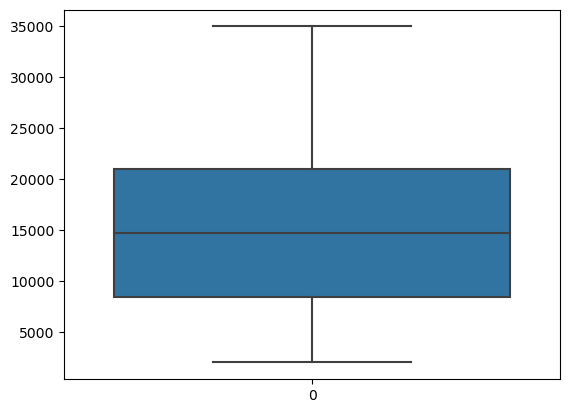

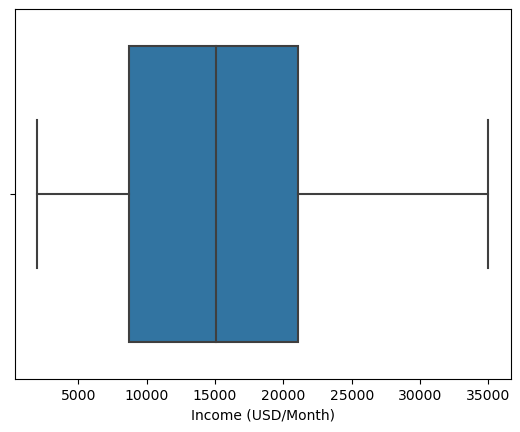

In [131]:
# Comparison of income distribution of high profit users and all users

sns.boxplot(xf['Income (USD/Month)'])
plt.show()

sns.boxplot(data=xf[xf["Profit"]>high_whisker], x='Income (USD/Month)');

#### Observations:
* The income distribution is similar both high profit transacions and all transactions

In [132]:
# Comparison of payment mode of high profit transactions and all transactions

print(xf['Payment_Mode'].value_counts(normalize=True)*100)
print('-' * 50)
xf[xf["Profit"]>high_whisker]['Payment_Mode'].value_counts(normalize=True)*100

Card   59.96
Cash   40.04
Name: Payment_Mode, dtype: float64
--------------------------------------------------


Card   59.49
Cash   40.51
Name: Payment_Mode, dtype: float64

#### Observations:
* The distribution of payment mode is similar in both high profit transactions and all transactions

In [133]:
# Comparison of weather of high profit transactions and all transactions

print(xf['Icon'].value_counts(normalize=True)*100)
print('-' * 50)
xf[xf["Profit"]>high_whisker]['Icon'].value_counts(normalize=True)*100

rain                41.16
partly-cloudy-day   37.93
clear-day           15.26
snow                 3.25
cloudy               2.29
wind                 0.10
Name: Icon, dtype: float64
--------------------------------------------------


rain                56.04
partly-cloudy-day   25.59
clear-day           12.01
snow                 5.63
cloudy               0.73
wind                 0.00
Name: Icon, dtype: float64

In [134]:
# Checking the prevalent weather in each city
wbc = pd.DataFrame(xf.groupby('City')['Icon'].value_counts(normalize=True)*100)
pd.set_option('display.max_rows', None)
wbc

Icon
City           Icon                   
ATLANTA GA     partly-cloudy-day 47.51
               rain              38.56
               clear-day         12.00
               cloudy             1.28
               snow               0.65
AUSTIN TX      partly-cloudy-day 54.92
               rain              27.29
               clear-day         14.50
               cloudy             3.29
BOSTON MA      rain              59.97
               partly-cloudy-day 32.44
               clear-day          3.46
               cloudy             2.40
               snow               1.31
               wind               0.41
CHICAGO IL     partly-cloudy-day 45.63
               rain              36.37
               clear-day          7.71
               snow               5.38
               cloudy             4.60
               wind               0.31
DALLAS TX      partly-cloudy-day 47.80
               rain              34.09
               clear-day         15.06
               cloudy             2.65
               snow               0.21
               wind               0.19
DENVER CO      partly-cloudy-day 64.89
               rain              23.35
               clear-day          6.09
               snow               4.10
               cloudy             1.02
               wind               0.55
LOS ANGELES CA clear-day         45.83
               partly-cloudy-day 37.75
               rain              14.74
               cloudy             1.68
MIAMI FL       rain              53.50
               partly-cloudy-day 42.07
               clear-day          4.04
               cloudy             0.39
NASHVILLE TN   partly-cloudy-day 40.56
               rain              40.53
               clear-day         16.61
               cloudy             1.73
               snow               0.56
NEW YORK NY    rain              59.61
               partly-cloudy-day 20.82
               clear-day         11.49
               snow               6.95
               cloudy             1.12
ORANGE COUNTY  partly-cloudy-day 60.35
               clear-day         23.36
               rain              15.65
               cloudy             0.65
PHOENIX AZ     rain              51.45
               partly-cloudy-day 32.36
               clear-day         15.60
               cloudy             0.34
               wind               0.24
PITTSBURGH PA  partly-cloudy-day 35.80
               rain              31.30
               clear-day         28.64
               cloudy             3.05
               snow               1.22
SACRAMENTO CA  clear-day         67.13
               rain              20.57
               partly-cloudy-day 12.13
               wind               0.13
               cloudy             0.04
SAN DIEGO CA   partly-cloudy-day 68.38
               rain              14.85
               clear-day         13.06
               cloudy             3.70
SEATTLE WA     rain              51.01
               partly-cloudy-day 30.62
               clear-day         15.81
               cloudy             2.21
               snow               0.35
SILICON VALLEY partly-cloudy-day 56.03
               clear-day         22.80
               rain              21.14
               cloudy             0.02
               snow               0.01
TUCSON AZ      clear-day         70.22
               rain              20.92
               partly-cloudy-day  8.86
WASHINGTON DC  partly-cloudy-day 47.20
               rain              42.93
               clear-day          4.18
               cloudy             3.27
               snow               2.38
               wind               0.05

#### Observations:
* Although it appears it tends to rain more for high profit transactions, that can be explained by the fact that most of such transactions are conducted in *NEW YORK NY* which experiences rain 60% of the time.

In [135]:
# Comparison of cab company distribution of high profit transactions and all transactions

print('The distribution of cab companies in all cities is:')
print(xf['Company'].value_counts(normalize=True)*100)
print('-' * 50)
print('The distribution of cab companies for high profit transactions is:')
print(xf[xf["Profit"]>high_whisker]['Company'].value_counts(normalize=True)*100)
print('-' * 50)
print('The distribution of cab companies in NEW YORK NY is:')
xf[xf["City"]=="NEW YORK NY"]['Company'].value_counts(normalize=True)*100

The distribution of cab companies in all cities is:
Yellow Cab   76.43
Pink Cab     23.57
Name: Company, dtype: float64
--------------------------------------------------
The distribution of cab companies for high profit transactions is:
Yellow Cab   99.18
Pink Cab      0.82
Name: Company, dtype: float64
--------------------------------------------------
The distribution of cab companies in NEW YORK NY is:


Yellow Cab   86.02
Pink Cab     13.98
Name: Company, dtype: float64

#### Observations:
* It appears the *Yellow Cab* is especially favoured for high profit transactions as it has a near absolute (99%) proportions of all high profit transactions
* This performance is higher than *Yellow Cab's* share of business in *NEW YORK NY* where the bulk of high profit transactions are conducted

In [136]:
# Checking the proportion of weekend transactions
xf['Weekend'] = xf['Date of Travel'].dt.weekday.isin([5, 6])

print('The proportion of weekend transactions is:')
print(xf['Weekend'].value_counts(normalize=True)*100)
print('-' * 50)
print('The proportion of high profit weekend transactions is:')
print(xf[xf["Profit"]>high_whisker]['Weekend'].value_counts(normalize=True)*100)
print('-' * 50)
print('The proportion of high profit weekend transactions in NEW YORK NY is:')
xf[xf["City"]=="NEW YORK NY"]['Weekend'].value_counts(normalize=True)*100

The proportion of weekend transactions is:
False   58.67
True    41.33
Name: Weekend, dtype: float64
--------------------------------------------------
The proportion of high profit weekend transactions is:
False   52.03
True    47.97
Name: Weekend, dtype: float64
--------------------------------------------------
The proportion of high profit weekend transactions in NEW YORK NY is:


False   58.65
True    41.35
Name: Weekend, dtype: float64

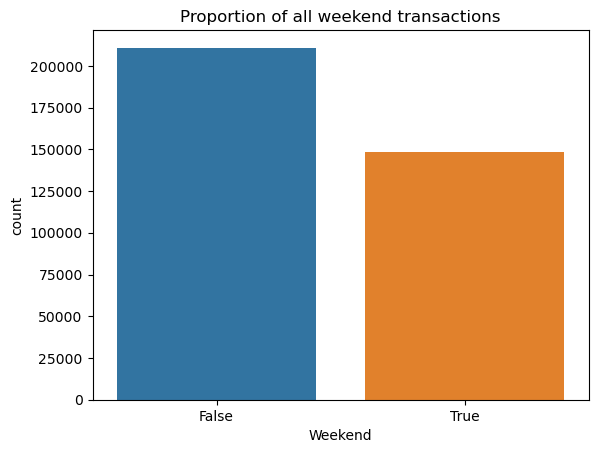

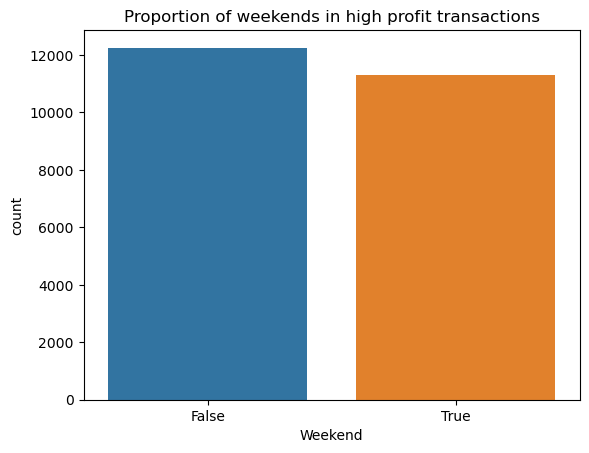

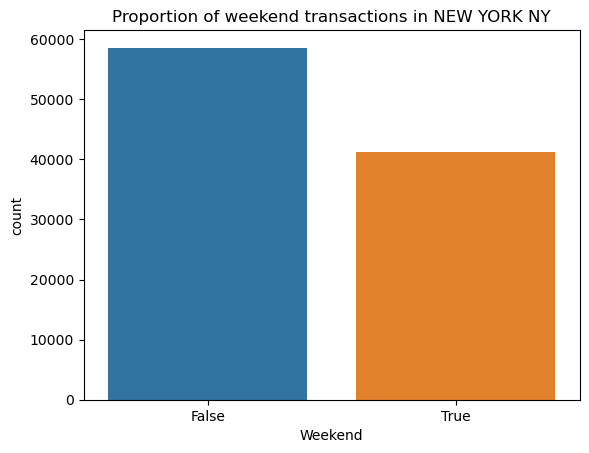

In [137]:
# Plot of weekend transactions
sns.countplot(data=xf, x='Weekend')
plt.title("Proportion of all weekend transactions")
plt.show()

sns.countplot(data=xf[xf["Profit"]>high_whisker], x='Weekend')
plt.title("Proportion of weekends in high profit transactions")
plt.show()

sns.countplot(data=xf[xf["City"]=="NEW YORK NY"], x='Weekend')
plt.title("Proportion of weekend transactions in NEW YORK NY")
plt.show();

#### Observations:
* Given that the proportion of weekend days is 28.57%, the proportion of all transaction is significant at 41.33%. More transactions tend to be conducted in the 2 days of the weekend than the rest of the week
* The propotion of weekends in high profit transactions is higher still compared to all transactions at 47.97%. The chances that a high profit transaction will on a weekend is higher than for all transaction
* The weekend distribution for *NEW YORK NY* is similar to all cities. *NEW YORK NY* users do not have a higher tendency to conduct transactions on a weekend than other cities but when they do it is more likely to be of high profit

In [138]:
# Creating year and month columns
xf['month'] = xf['Date of Travel'].dt.month_name()
xf['year'] = xf['Date of Travel'].dt.year
xf.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Gender,Age,Income (USD/Month),Icon,Holiday,Profit,age_group,Weekend,month,year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,814885,24701,29290,...,Male,28,10813,rain,No Holiday,57.31,<30,False,January,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,27703,...,Male,27,9237,partly-cloudy-day,No Holiday,23.67,<30,False,January,2016


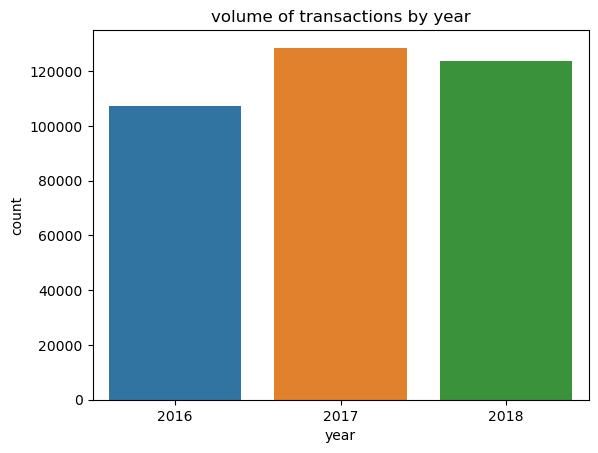

In [139]:
# Plot of transactions volume by year
sns.countplot(data=xf, x='year')
plt.title("volume of transactions by year")
plt.show();

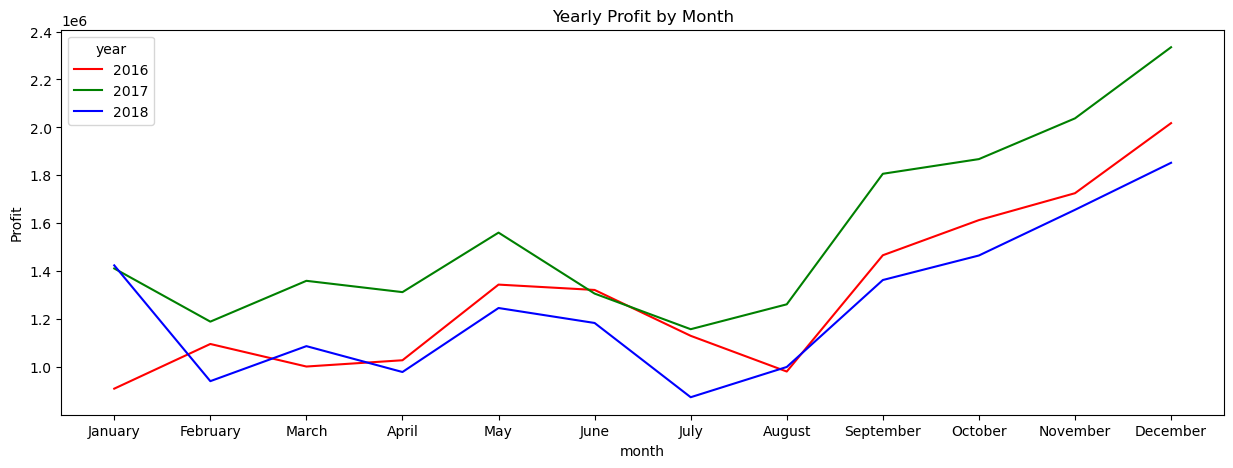

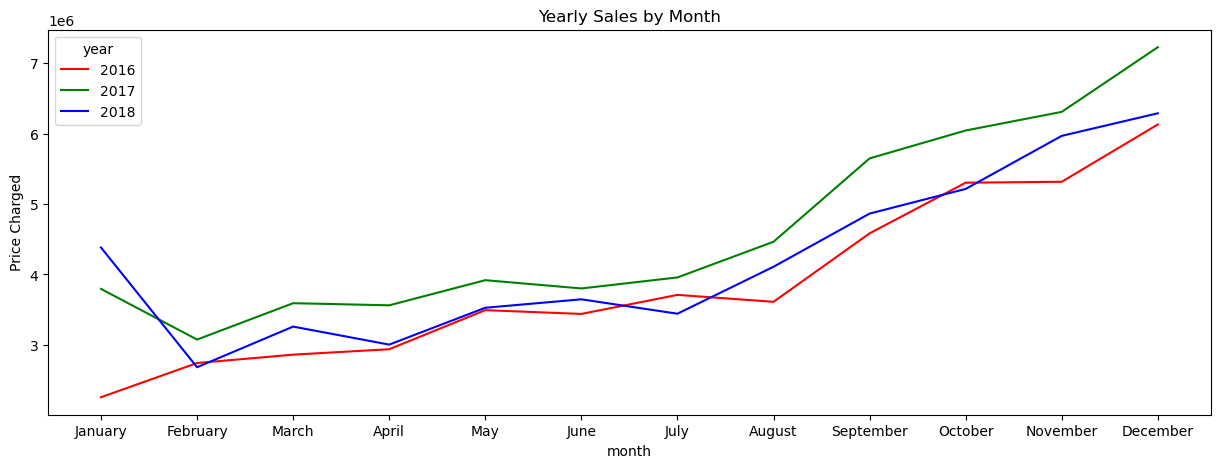

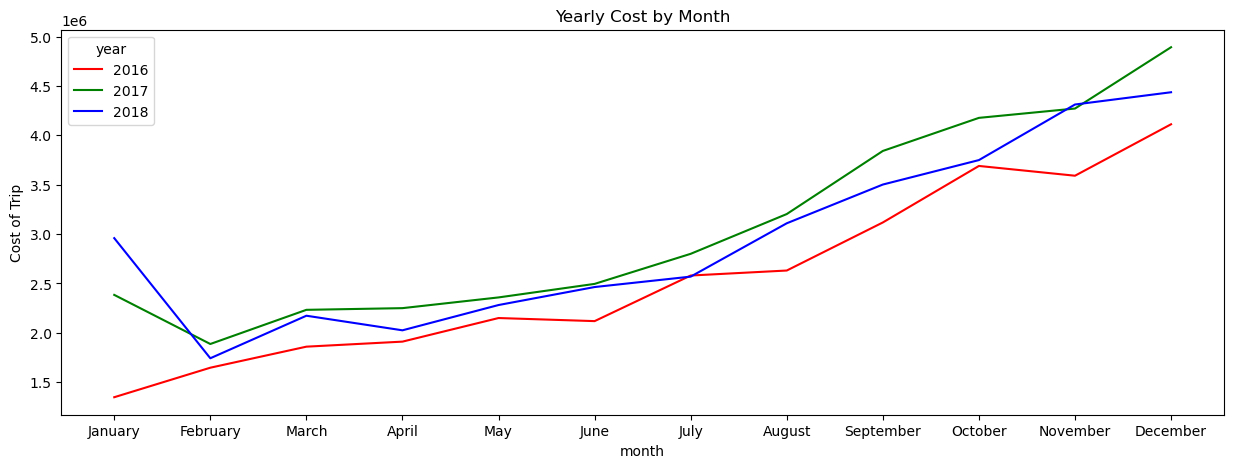

In [140]:
# Grouping the dataframe by year and month
yearly_sales = xf.groupby(['year', 'month']).sum().reset_index()
yearly_sales['month'] = pd.Categorical(yearly_sales['month'],
                                   categories=['January', 'February', 'March', 'April',
                                               'May', 'June', 'July', 'August', 'September',
                                               'October', 'November', 'December'],
                                   ordered=True)

# Plotting yearly profit by month
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='Profit', hue='year', data=yearly_sales, palette=['red', 'green', 'blue'])
plt.title("Yearly Profit by Month");

# Plotting yearly sales by month
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='Price Charged', hue='year', data=yearly_sales, palette=['red', 'green', 'blue'])
plt.title("Yearly Sales by Month");

# Plotting yearly total cost by month
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='Cost of Trip', hue='year', data=yearly_sales, palette=['red', 'green', 'blue'])
plt.title("Yearly Cost by Month");

#### Observations:
* The volume of transactions is highest is `2017` and lowest in `2016`
* Profit improve generally as the month approach the end of the year for each year
* Profit is highest for `2017` and lowest for `2018` despite 2018 having higher transaction volume than `2016`
* Although `2018` sales is generally at the same level as `2016` it recorded higher cost than `2016`

### Profit Transactions vs Loss Transactions analysis

In [141]:
# Investing loss transactions

print('Observation:')
profit_trans = xf[xf['Profit']>0]
print(f'The count of profit transactions is {profit_trans.shape[0]}')

loss_trans = xf[xf['Profit']<0]
print(f'The count of loss transactions is {loss_trans.shape[0]}')
print(f'The percentage of loss transactions is {round((loss_trans.shape[0]*100)/xf.shape[0],2)}%')

Observation:
The count of profit transactions is 334569
The count of loss transactions is 24819
The percentage of loss transactions is 6.91%


In [142]:
# Checking the head of the data
loss_trans.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Gender,Age,Income (USD/Month),Icon,Holiday,Profit,age_group,Weekend,month,year
150,10009063,2016-02-21,Pink Cab,ATLANTA GA,6.78,65.70,77.29,814885,24701,29525,...,Female,20,7199,rain,No Holiday,-11.59,<30,True,February,2016
152,10009065,2016-02-20,Pink Cab,ATLANTA GA,4.48,47.93,48.83,814885,24701,28136,...,Male,35,21085,partly-cloudy-day,No Holiday,-0.90,30-39,True,February,2016
153,10009066,2016-02-13,Pink Cab,ATLANTA GA,28.75,316.44,319.12,814885,24701,28685,...,Female,28,2931,clear-day,No Holiday,-2.69,<30,True,February,2016


In [143]:
print(f'The least distance traveld in loss transactions is {loss_trans["KM Travelled"].min()}km while the longest distance traveled is {loss_trans["KM Travelled"].max()}km')
print(f'The least distance traveld in profit transactions is {profit_trans["KM Travelled"].min()}km while the longest distance traveled is {profit_trans["KM Travelled"].max()}km')

The least distance traveld in loss transactions is 1.9km while the longest distance traveled is 48.0km
The least distance traveld in profit transactions is 1.9km while the longest distance traveled is 48.0km


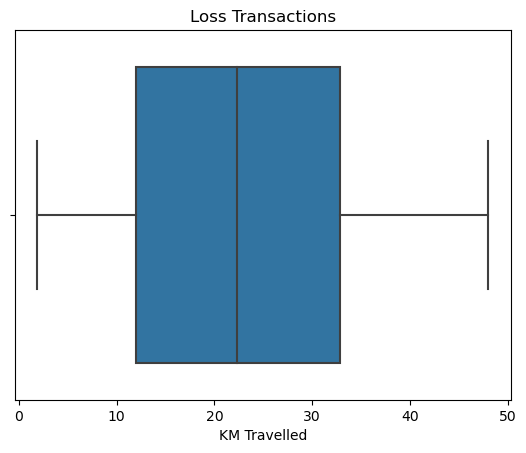

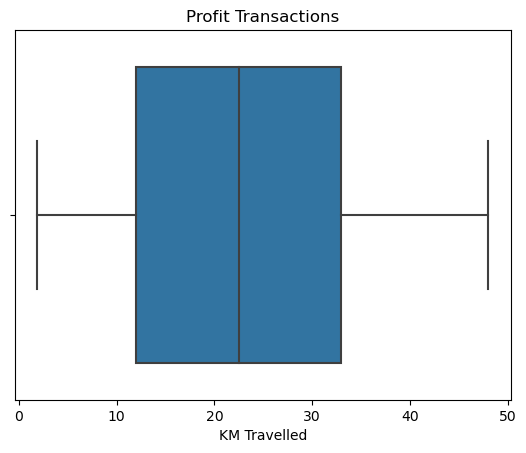

In [144]:
# Checking the KM travelled in loss transactions vs profit transactions
sns.boxplot(data=loss_trans, x='KM Travelled')
plt.title("Loss Transactions")
plt.show()

sns.boxplot(data=profit_trans, x='KM Travelled')
plt.title("Profit Transactions");

#### Observation:
- Distance traveled does not appear to influence profit or loss of each transaction

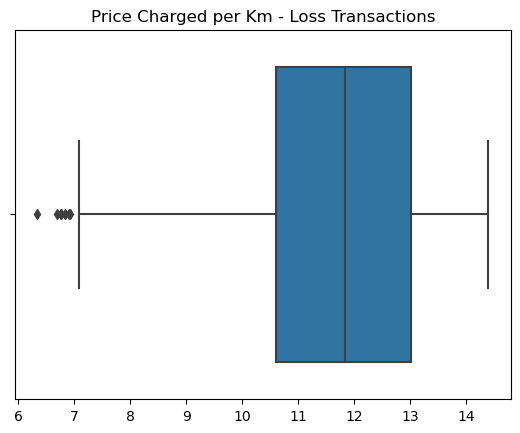

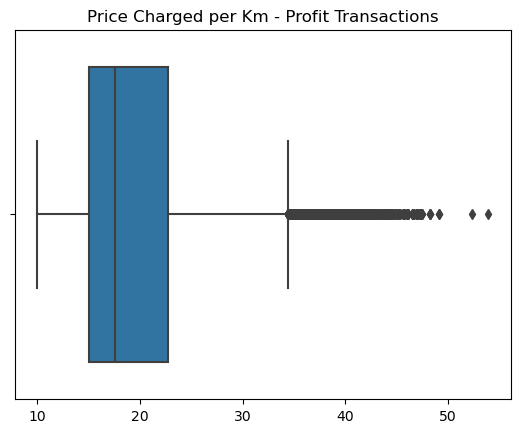

In [145]:
# Checking the price charged per km traveled
sns.boxplot(data=loss_trans, x=loss_trans["Price Charged"]/loss_trans["KM Travelled"])
plt.title("Price Charged per Km - Loss Transactions")
plt.show()

sns.boxplot(data=profit_trans, x=profit_trans["Price Charged"]/profit_trans["KM Travelled"])
plt.title("Price Charged per Km - Profit Transactions")
plt.show()

#### Observations:
- Generally, the price charged per km for profit transactions are higher than loss transactions
- There is an overlap area between 10USD  and 15USD where both profit and loss can result. This suggest price charged per km is not the only factor at play

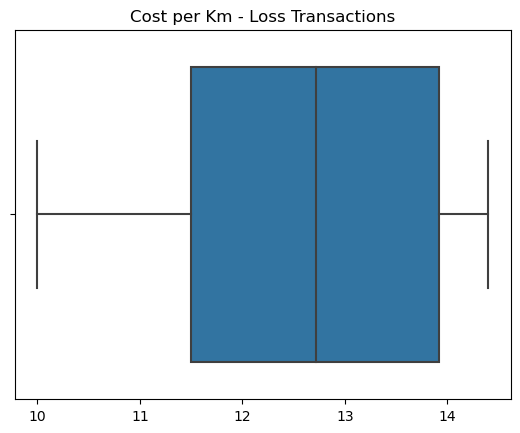

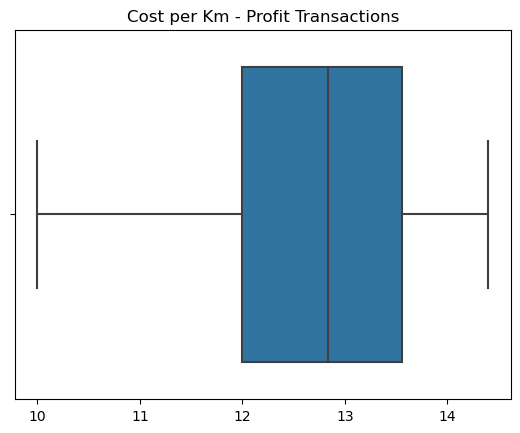

In [146]:
# Checking the cost per km traveled
sns.boxplot(data=loss_trans, x=loss_trans["Cost of Trip"]/loss_trans["KM Travelled"])
plt.title("Cost per Km - Loss Transactions")
plt.show()

sns.boxplot(data=profit_trans, x=profit_trans["Cost of Trip"]/profit_trans["KM Travelled"])
plt.title("Cost per Km - Profit Transactions")
plt.show()

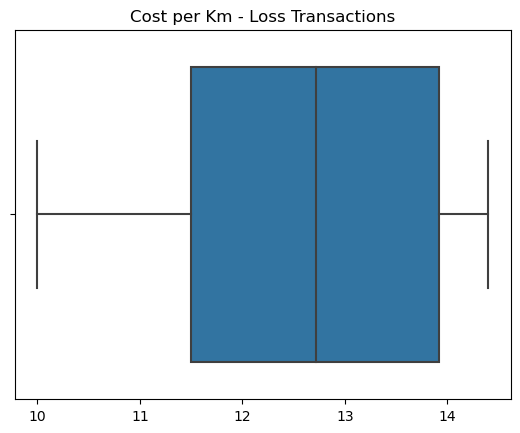

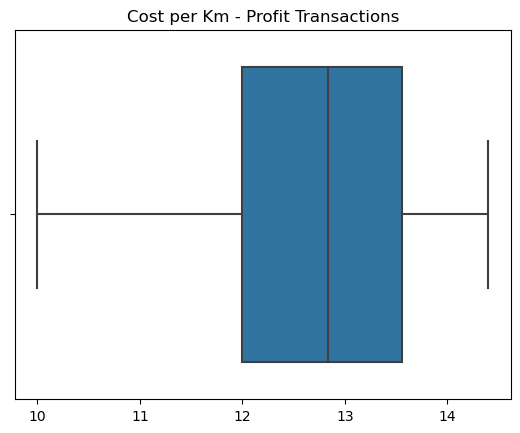

In [147]:
# Checking the cost per km traveled
sns.boxplot(data=loss_trans, x=loss_trans["Cost of Trip"]/loss_trans["KM Travelled"], hue=loss_trans['City'])
plt.title("Cost per Km - Loss Transactions")
plt.show()

sns.boxplot(data=profit_trans, x=profit_trans["Cost of Trip"]/profit_trans["KM Travelled"], hue='City')
plt.title("Cost per Km - Profit Transactions")
plt.show()

#### Observations:

- Both profit and loss transactions are almost identical in their cost per km. 
- There is no significant difference in the boxplots that explain a loss or profit per trip

In [148]:
# Checking the influence of weather on profit/loss
print('Weather distribution for loss transactions')
print(loss_trans["Icon"].value_counts(normalize=True)*100)
print('-'*50)
print('Weather distribution for profit transactions')
print(profit_trans["Icon"].value_counts(normalize=True)*100)

Weather distribution for loss transactions
partly-cloudy-day   44.09
rain                36.02
clear-day           15.54
cloudy               2.64
snow                 1.55
wind                 0.16
Name: Icon, dtype: float64
--------------------------------------------------
Weather distribution for profit transactions
rain                41.54
partly-cloudy-day   37.48
clear-day           15.24
snow                 3.38
cloudy               2.27
wind                 0.10
Name: Icon, dtype: float64


#### Observation:
- The weather distribution is similar for both types of transactions
- `partly-cloudy-day` and `rain` are the dominant weather types for both types of transaction
- While `partly-cloudy-day` is the most common weather type for loss transactions `rain` is the most common weather type for profit distribution
- There is sufficient evidence from the data that weather has an influence on profit or loss of any transaction

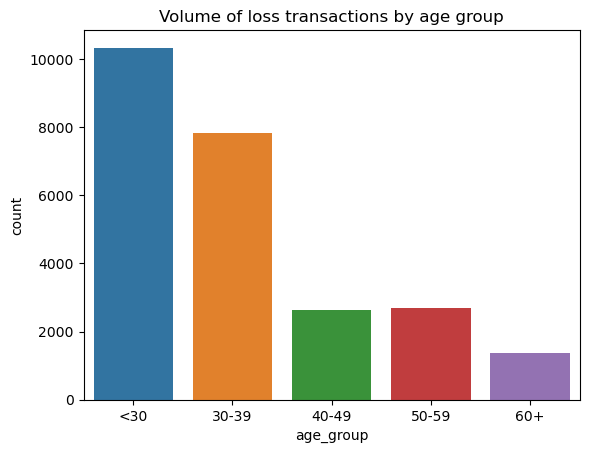

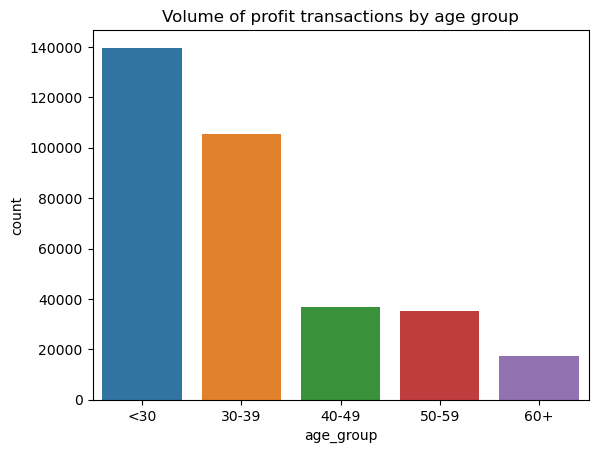

In [149]:
# Plot of profit/loss transactions volume by age group
sns.countplot(data=loss_trans, x='age_group')
plt.title("Volume of loss transactions by age group")
plt.show()

sns.countplot(data=profit_trans, x='age_group')
plt.title("Volume of profit transactions by age group")
plt.show();

#### Observations:

- The distribution of pattern volume of transactions by age group for each type of transaction is similar
- There is no evidence  from data that age group distribution has any effect on the type of transaction

In [150]:
# Plot of profit/loss transactions volume by weekend
print('Observations:')
print(' ')
print('Proportion of weekend transactions - Loss transaction')
print(loss_trans["Weekend"].value_counts(normalize=True)*100)
print('-'*50)
print('Proportion of weekend transactions - Profit transactions')
print(profit_trans["Weekend"].value_counts(normalize=True)*100)

Observations:
 
Proportion of weekend transactions - Loss transaction
False   67.51
True    32.49
Name: Weekend, dtype: float64
--------------------------------------------------
Proportion of weekend transactions - Profit transactions
False   58.01
True    41.99
Name: Weekend, dtype: float64


#### Obervations:

- Profit transactions have a higher proportion of weekend transactions than loss transactions by 9.5%

In [151]:
# Plot of profit/loss transactions volume by city
print('Observations:')
print(' ')
print('Proportion of transactions by city - Loss transaction')
print(loss_trans['City'].value_counts(normalize=True)*100)
print('-'*50)
print('Proportion of transactions by city - Profit transactions')
print(profit_trans['City'].value_counts(normalize=True)*100)

Observations:
 
Proportion of transactions by city - Loss transaction
CHICAGO IL       31.83
BOSTON MA        15.10
WASHINGTON DC    12.90
LOS ANGELES CA   12.20
SAN DIEGO CA      5.09
SEATTLE WA        3.32
NASHVILLE TN      2.79
DALLAS TX         2.18
SACRAMENTO CA     2.08
DENVER CO         2.01
NEW YORK NY       1.83
ATLANTA GA        1.46
MIAMI FL          1.36
PITTSBURGH PA     1.35
TUCSON AZ         1.12
PHOENIX AZ        1.00
AUSTIN TX         0.97
ORANGE COUNTY     0.93
SILICON VALLEY    0.47
Name: City, dtype: float64
--------------------------------------------------
Proportion of transactions by city - Profit transactions
NEW YORK NY      29.72
CHICAGO IL       14.56
LOS ANGELES CA   13.45
WASHINGTON DC    12.12
BOSTON MA         7.75
SAN DIEGO CA      5.75
SILICON VALLEY    2.51
ATLANTA GA        2.15
SEATTLE WA        2.14
DALLAS TX         1.94
MIAMI FL          1.83
AUSTIN TX         1.39
ORANGE COUNTY     1.12
DENVER CO         0.99
NASHVILLE TN      0.69
SACRAMENTO CA

#### Observations:
- Aside `NEW YORK NY`, all other cities have similar levels of percentage contribution to profit and loss transactions
- Transactions done in `NEW YORK NY` contribute the most (30%) to profit transactions while contributing less than 2% to loss transactions
- `NEW YORK NY` is also the largest contributor by volume to all transactions. This skews the data for profit and loss

In [152]:
# Average distance traveled by city
xf.groupby(['City'])['KM Travelled'].mean()

City
ATLANTA GA       22.32
AUSTIN TX        22.31
BOSTON MA        22.58
CHICAGO IL       22.63
DALLAS TX        22.49
DENVER CO        22.45
LOS ANGELES CA   22.67
MIAMI FL         22.53
NASHVILLE TN     22.70
NEW YORK NY      22.51
ORANGE COUNTY    22.31
PHOENIX AZ       22.20
PITTSBURGH PA    22.62
SACRAMENTO CA    22.76
SAN DIEGO CA     22.48
SEATTLE WA       22.62
SILICON VALLEY   22.74
TUCSON AZ        22.39
WASHINGTON DC    22.61
Name: KM Travelled, dtype: float64

In [153]:
# Average distance traveled by city - loss transactions vs profit transactions
print('Average distance traveled by city - loss transactions')
print(loss_trans.groupby(['City'])['KM Travelled'].mean())
print('-'*50)
print('Average distance traveled by city - profit transactions')
profit_trans.groupby(['City'])['KM Travelled'].mean()

Average distance traveled by city - loss transactions
City
ATLANTA GA       22.12
AUSTIN TX        21.51
BOSTON MA        22.35
CHICAGO IL       22.67
DALLAS TX        21.87
DENVER CO        21.84
LOS ANGELES CA   22.75
MIAMI FL         23.45
NASHVILLE TN     22.91
NEW YORK NY      22.10
ORANGE COUNTY    22.44
PHOENIX AZ       21.61
PITTSBURGH PA    21.81
SACRAMENTO CA    22.78
SAN DIEGO CA     22.23
SEATTLE WA       22.31
SILICON VALLEY   23.53
TUCSON AZ        21.85
WASHINGTON DC    22.26
Name: KM Travelled, dtype: float64
--------------------------------------------------
Average distance traveled by city - profit transactions


City
ATLANTA GA       22.33
AUSTIN TX        22.35
BOSTON MA        22.61
CHICAGO IL       22.63
DALLAS TX        22.54
DENVER CO        22.54
LOS ANGELES CA   22.66
MIAMI FL         22.48
NASHVILLE TN     22.64
NEW YORK NY      22.52
ORANGE COUNTY    22.30
PHOENIX AZ       22.28
PITTSBURGH PA    22.91
SACRAMENTO CA    22.75
SAN DIEGO CA     22.49
SEATTLE WA       22.66
SILICON VALLEY   22.73
TUCSON AZ        22.48
WASHINGTON DC    22.64
Name: KM Travelled, dtype: float64

#### Observations:
- The average distance covered by city for profit or loss transactions is essentially the same.
- There is no significant difference in the average distance traveled by city for profit or loss transactions.

In [154]:
# Average Price Charged by city - loss transactions vs profit transactions
print('Average price charged by city - loss transactions')
print(loss_trans.groupby(['City'])['Price Charged'].mean().sort_values(ascending=False))
print('-'*50)
print('Average price charged by city - profit transactions')
profit_trans.groupby(['City'])['Price Charged'].mean().sort_values(ascending=False)

Average price charged by city - loss transactions
City
WASHINGTON DC    283.46
CHICAGO IL       275.46
BOSTON MA        273.34
SACRAMENTO CA    255.62
LOS ANGELES CA   254.91
SAN DIEGO CA     253.81
SILICON VALLEY   253.78
MIAMI FL         252.46
ORANGE COUNTY    251.49
TUCSON AZ        250.52
AUSTIN TX        245.91
SEATTLE WA       245.52
ATLANTA GA       245.20
NASHVILLE TN     242.80
NEW YORK NY      239.22
PITTSBURGH PA    224.79
PHOENIX AZ       222.77
DENVER CO        218.28
DALLAS TX        211.79
Name: Price Charged, dtype: float64
--------------------------------------------------
Average price charged by city - profit transactions


City
NEW YORK NY      571.71
DALLAS TX        467.59
SILICON VALLEY   434.95
MIAMI FL         407.91
DENVER CO        406.98
ATLANTA GA       401.90
ORANGE COUNTY    399.00
AUSTIN TX        390.49
PHOENIX AZ       386.34
WASHINGTON DC    381.37
LOS ANGELES CA   378.26
PITTSBURGH PA    375.65
SEATTLE WA       369.77
TUCSON AZ        364.68
CHICAGO IL       362.55
BOSTON MA        359.82
SAN DIEGO CA     354.55
NASHVILLE TN     341.32
SACRAMENTO CA    340.25
Name: Price Charged, dtype: float64

In [155]:
# Checking the difference between the average prices 
print('Difference of average price charged by city')
profit_trans.groupby(['City'])['Price Charged'].mean().sort_index() - loss_trans.groupby(['City'])['Price Charged'].mean().sort_index()

Difference of average price charged by city


City
ATLANTA GA       156.70
AUSTIN TX        144.58
BOSTON MA         86.49
CHICAGO IL        87.08
DALLAS TX        255.80
DENVER CO        188.70
LOS ANGELES CA   123.36
MIAMI FL         155.45
NASHVILLE TN      98.52
NEW YORK NY      332.49
ORANGE COUNTY    147.50
PHOENIX AZ       163.57
PITTSBURGH PA    150.85
SACRAMENTO CA     84.63
SAN DIEGO CA     100.74
SEATTLE WA       124.26
SILICON VALLEY   181.16
TUCSON AZ        114.16
WASHINGTON DC     97.91
Name: Price Charged, dtype: float64

#### Observations:
- Generally, all the cities have significantly higher prices in profit transactions than in loss transactions
- The city with the highest average price is `NEW YORK NY`.

## Conclusion and Business Recommendations

### Conclusions:

- Yellow cab is the most common cab company in all the cities
- `NEW YORK NY` has the most number of transactions with 28%. The other cities in the top 5 are `CHICAGO IL`, `LOS ANGELES CA`, `WASHINGTON DC` and `BOSTON MA`. The top 5 cities are responsible for 77% of all transactions.
- `NEW YORK NY` has the highest average price charged per city
- The average `KM Travelled` is 22.57km. The average `KM Travelled` perc city is between 21km and 23km.
- The `Cost of Trip` is fairly similar for various types of transactions
- The higher the number of users the higher the transaction volume
- `Card` transactions are more than `Cash` transactions (60% to 40%)
- There is no significant of `age groups` on profit of transaction however, users tend to be younger with the youngest age group being the most active and the oldest age group being the least
- `Income` does not appear to have any effect on user activity or profitability
- Although the user activity or transactions increase as the year approach `December` or `Winter` months, most activity occur on `rainy` or `clear/cloudy days`. `Windy` days record the least amount of activity
- The activity on `holidays` follows the general pattern of monthly activites. `Holidays` in the later part of the years record higher transactions than holidays in the earlier part of the year
- The average `Price Charged` and `Profit` for `Yellow cab` is significantly higher than that for `Pink cab`
- Generally, there are more `Male` than `Female` users
- The biggest factor that determines profit is `Price Charged`. Additional factor include being in the city of `NEW YORK NY`.
- There is a higher tendency for transactions to occur on a `weekend` day than any `weekday`
- 2017 recorded the highest volume of transaction then `2018` and `2016`. Expectedly, `2017` recorded more profit. However, `2016` recorded more profit than `2018` 

### Recommendations:
- The ideal business from this datasets is the `Yellow cab` company working in `NEW YORK NY` with emphasis on capturing more business from month to month as the year approaches `December`
- Emphasis should be placed on increasing the number of `Users`. High `Population` offer the best places to increase new `Users` especially `NEW YORK NY`
- Pricing structure or strategy should be reviewed to reduce the number of transactions with losses
- Marketing effort should be designed for younger `Users` than the olders one since they are responsible for more of the transactions
- Effort should be made to put more cabs on the road as the year approach it's end
- Effort should be made to ensure that cab services are available to `Users` not just on clear or cloudy days but also on rainy days. Resources can be conserved for windy snowy days
- As most transactions are settled by card payment, effort should be made make sure that this is done hassle-free
- Additonal data is needed to see if the trends observed is true for other US cities
